# **Assignment - Koustav Pal**

The dataset used in this notebook is annotated with Roboflow. The annotated dataset is provided in the github folder.

The dataset is trained with different Yolov8 weights and also with different epochs. The confusion matrices and the graphs of the different training is compared and validation is done on the training weights which was better than the other. Though the no of epochs chosen was small because of gpu restrictions (as the notebook is run on free version of google colab), it is to be noticed that the accuray was increasing when the epochs increased.

The detailed graphs of every training is provided in the github folder with proper title for easy understanding.

# **Pre-requisite**

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

# **Importing Dataset from Roboflow**

**ABOUT THE DATESET**

The dataset was fomed choosing 56 images from the folder assigned to me. The images were annoteted in the following 4 classes.


1.   By Pass Diode
2.   Light Hot Spot
3.   Dark Hot Spot
4.   Normal Panel

**Preprocessing Steps:**



1.   Auto-Orient
2.   Resized to 640x640



The dataset was augmented by flipping the box region horizontally and adjusting the brightness of the images.

**Train/Validate split of the dataset.**

1.   Train Images: 117
2.   Validate Images: 16





In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

# the api_key is removed for security purposes

from roboflow import Roboflow
rf = Roboflow(api_key="api_key")
project = rf.workspace("project-ygqew").project("koustav-assignment-3")
dataset = project.version(1).download("yolov8")

/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=695725fec05d0d4be42fe1d1cbe4737cc75f87634cf849662db083e27cd5c7a5
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to koustav-assignment-3-1 in yolov8:: 100%|██████████| 280/280 [00:00<00:00, 1363.00it/s]


# **Training the dataset**

In [ ]:
# Training with yolov8s-seg.pt

%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

/content
100% 22.8M/22.8M [00:02<00:00, 11.3MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/koustav-assignment-3-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [ ]:
# Training with yolov8m-seg.pt

%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

/content
100% 52.4M/52.4M [00:06<00:00, 8.56MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/koustav-assignment-3-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [ ]:
# Training with yolov8n-seg.pt

%cd {HOME}

!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

/content
100% 6.73M/6.73M [00:03<00:00, 2.18MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/datasets/koustav-assignment-3-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [5]:
# Training with yolov8x-seg.pt

%cd {HOME}

!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

/content
100% 137M/137M [00:13<00:00, 10.6MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/datasets/koustav-assignment-3-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 

In [9]:
# Training with yolov8m-seg.pt with no of epochs increased to 40.

%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

/content
100% 52.4M/52.4M [00:07<00:00, 7.66MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/koustav-assignment-3-1/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

# **Verifying training with different graphs**
## All the graphs are provided in the git-hub folder for reference

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					     results.csv
BoxF1_curve.png					     results.png
BoxP_curve.png					     train_batch0.jpg
BoxPR_curve.png					     train_batch1.jpg
BoxR_curve.png					     train_batch2.jpg
confusion_matrix.png				     train_batch80.jpg
events.out.tfevents.1677338832.30b2dee40ec8.19939.0  train_batch81.jpg
MaskF1_curve.png				     train_batch82.jpg
MaskP_curve.png					     val_batch0_labels.jpg
MaskPR_curve.png				     val_batch0_pred.jpg
MaskR_curve.png					     weights


/content


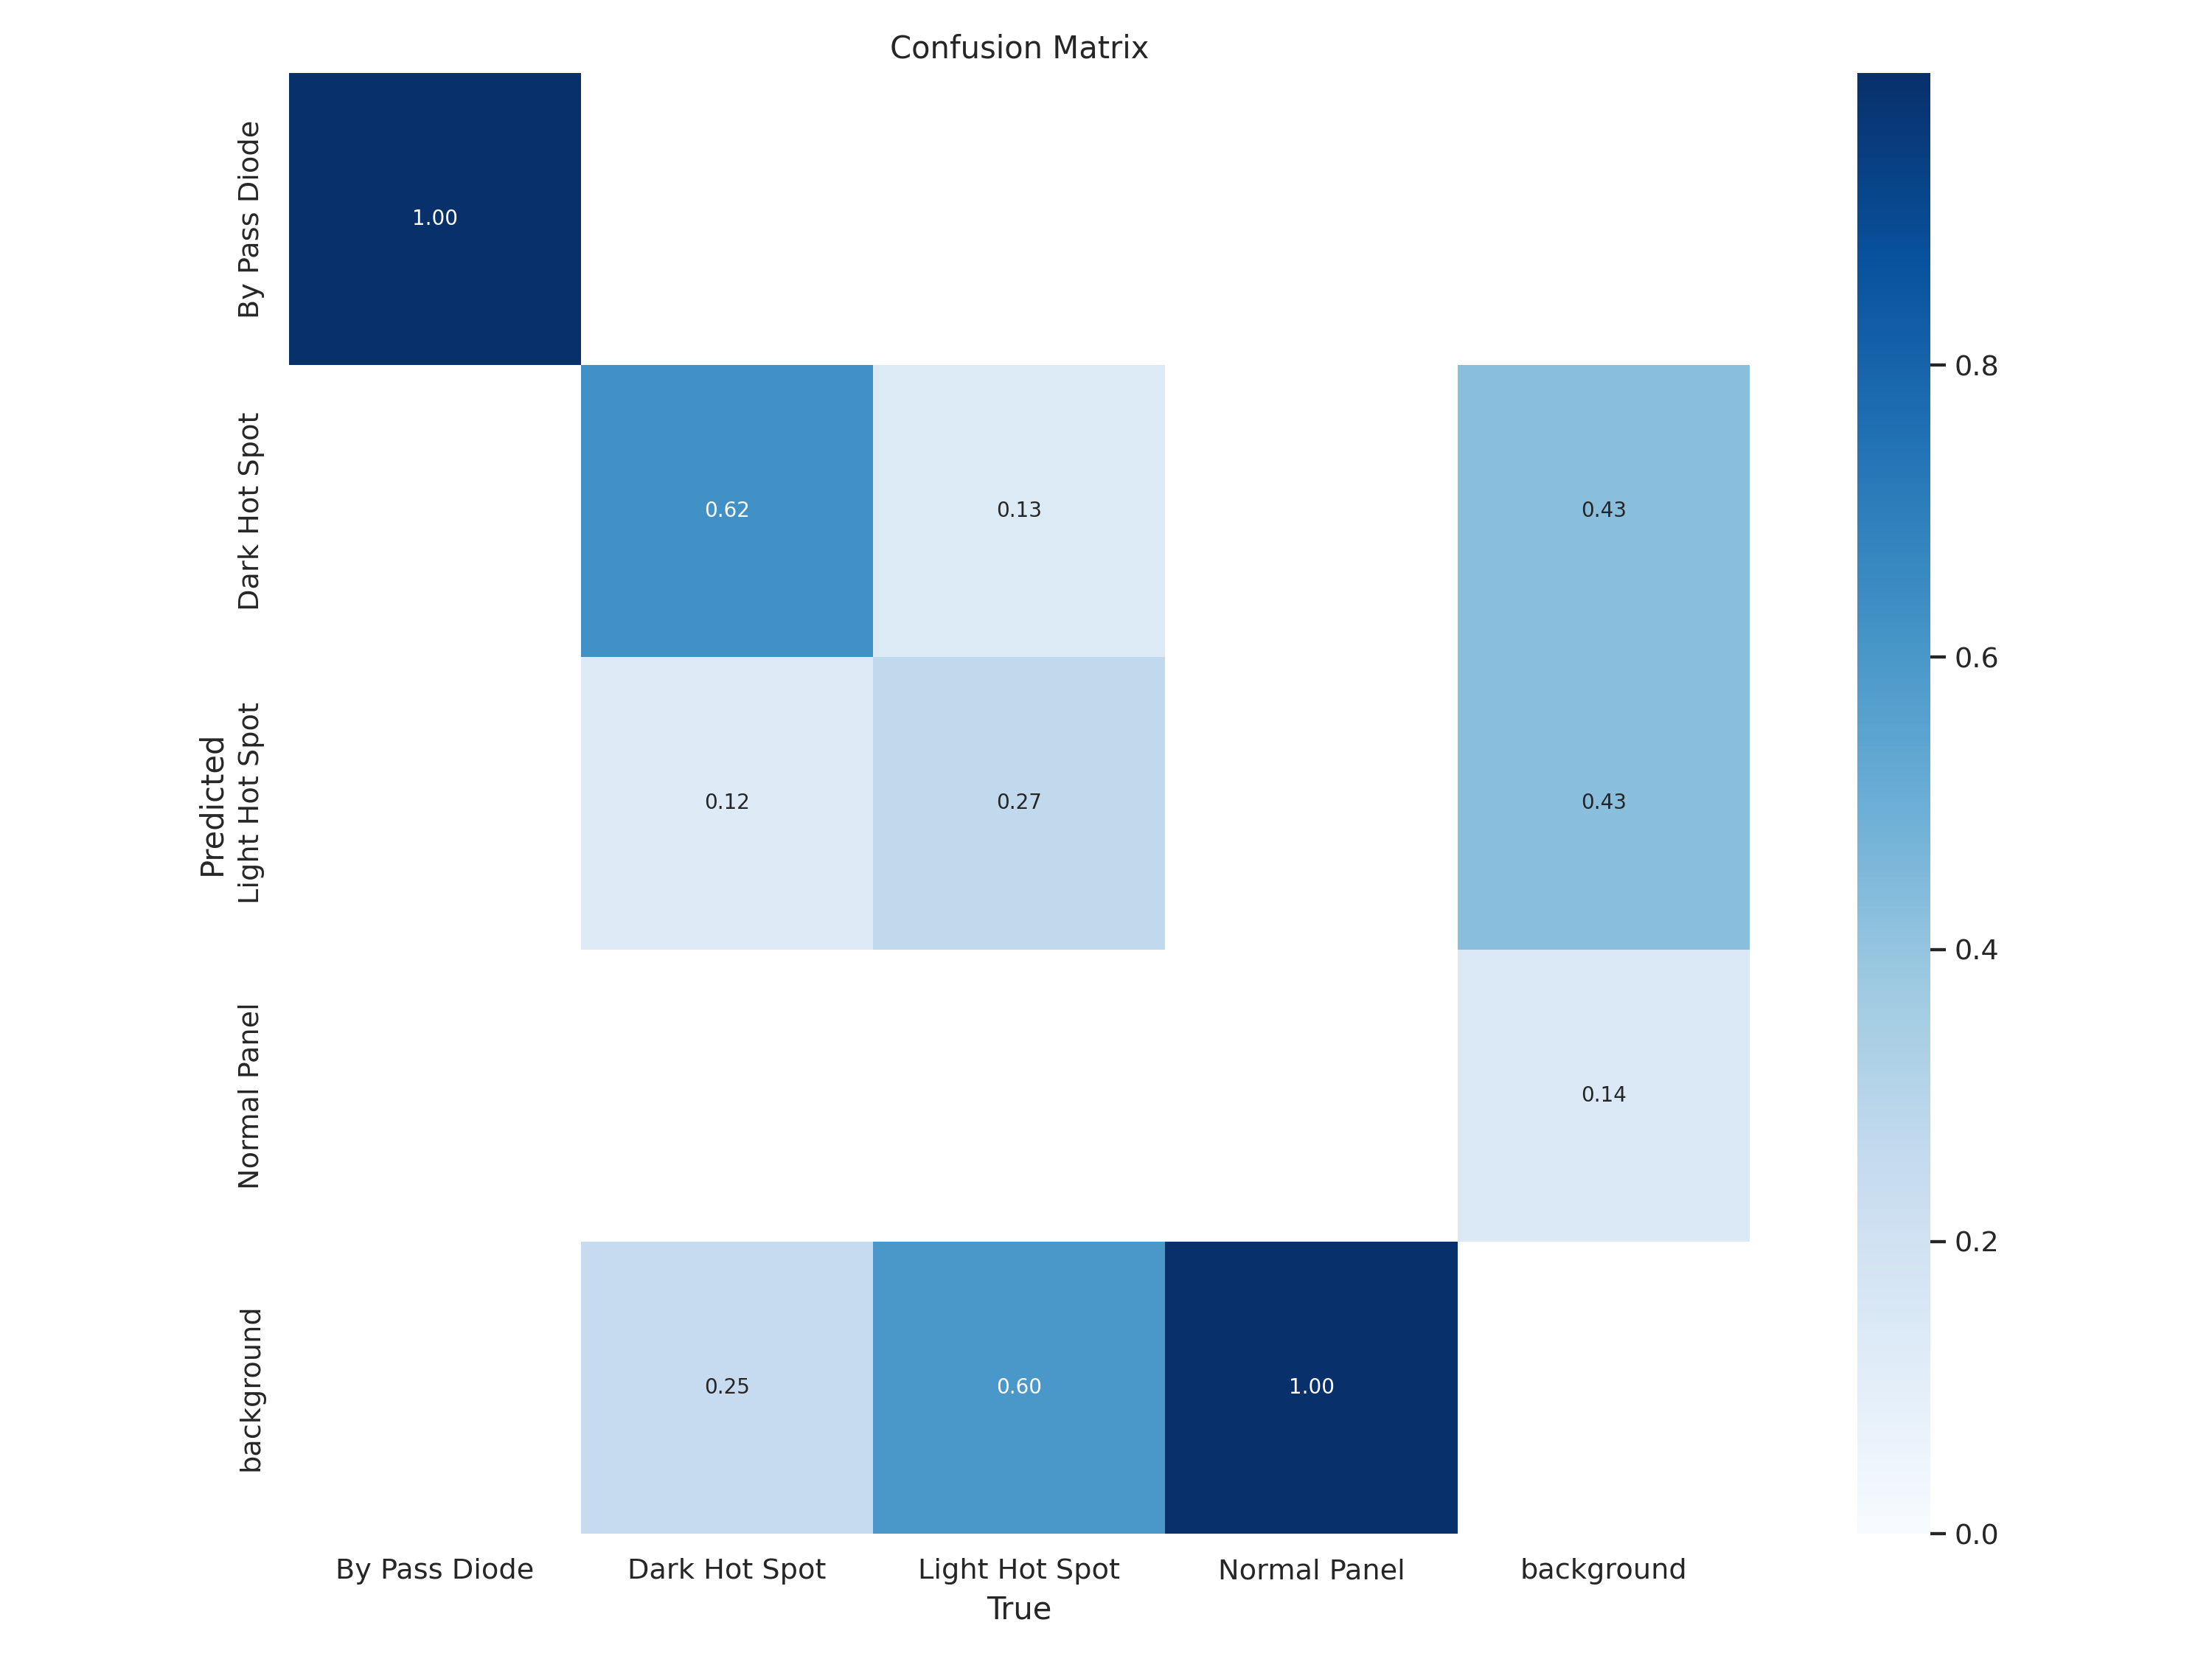

In [ ]:
# Confusion matrix for yolov8s-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=1000)

/content


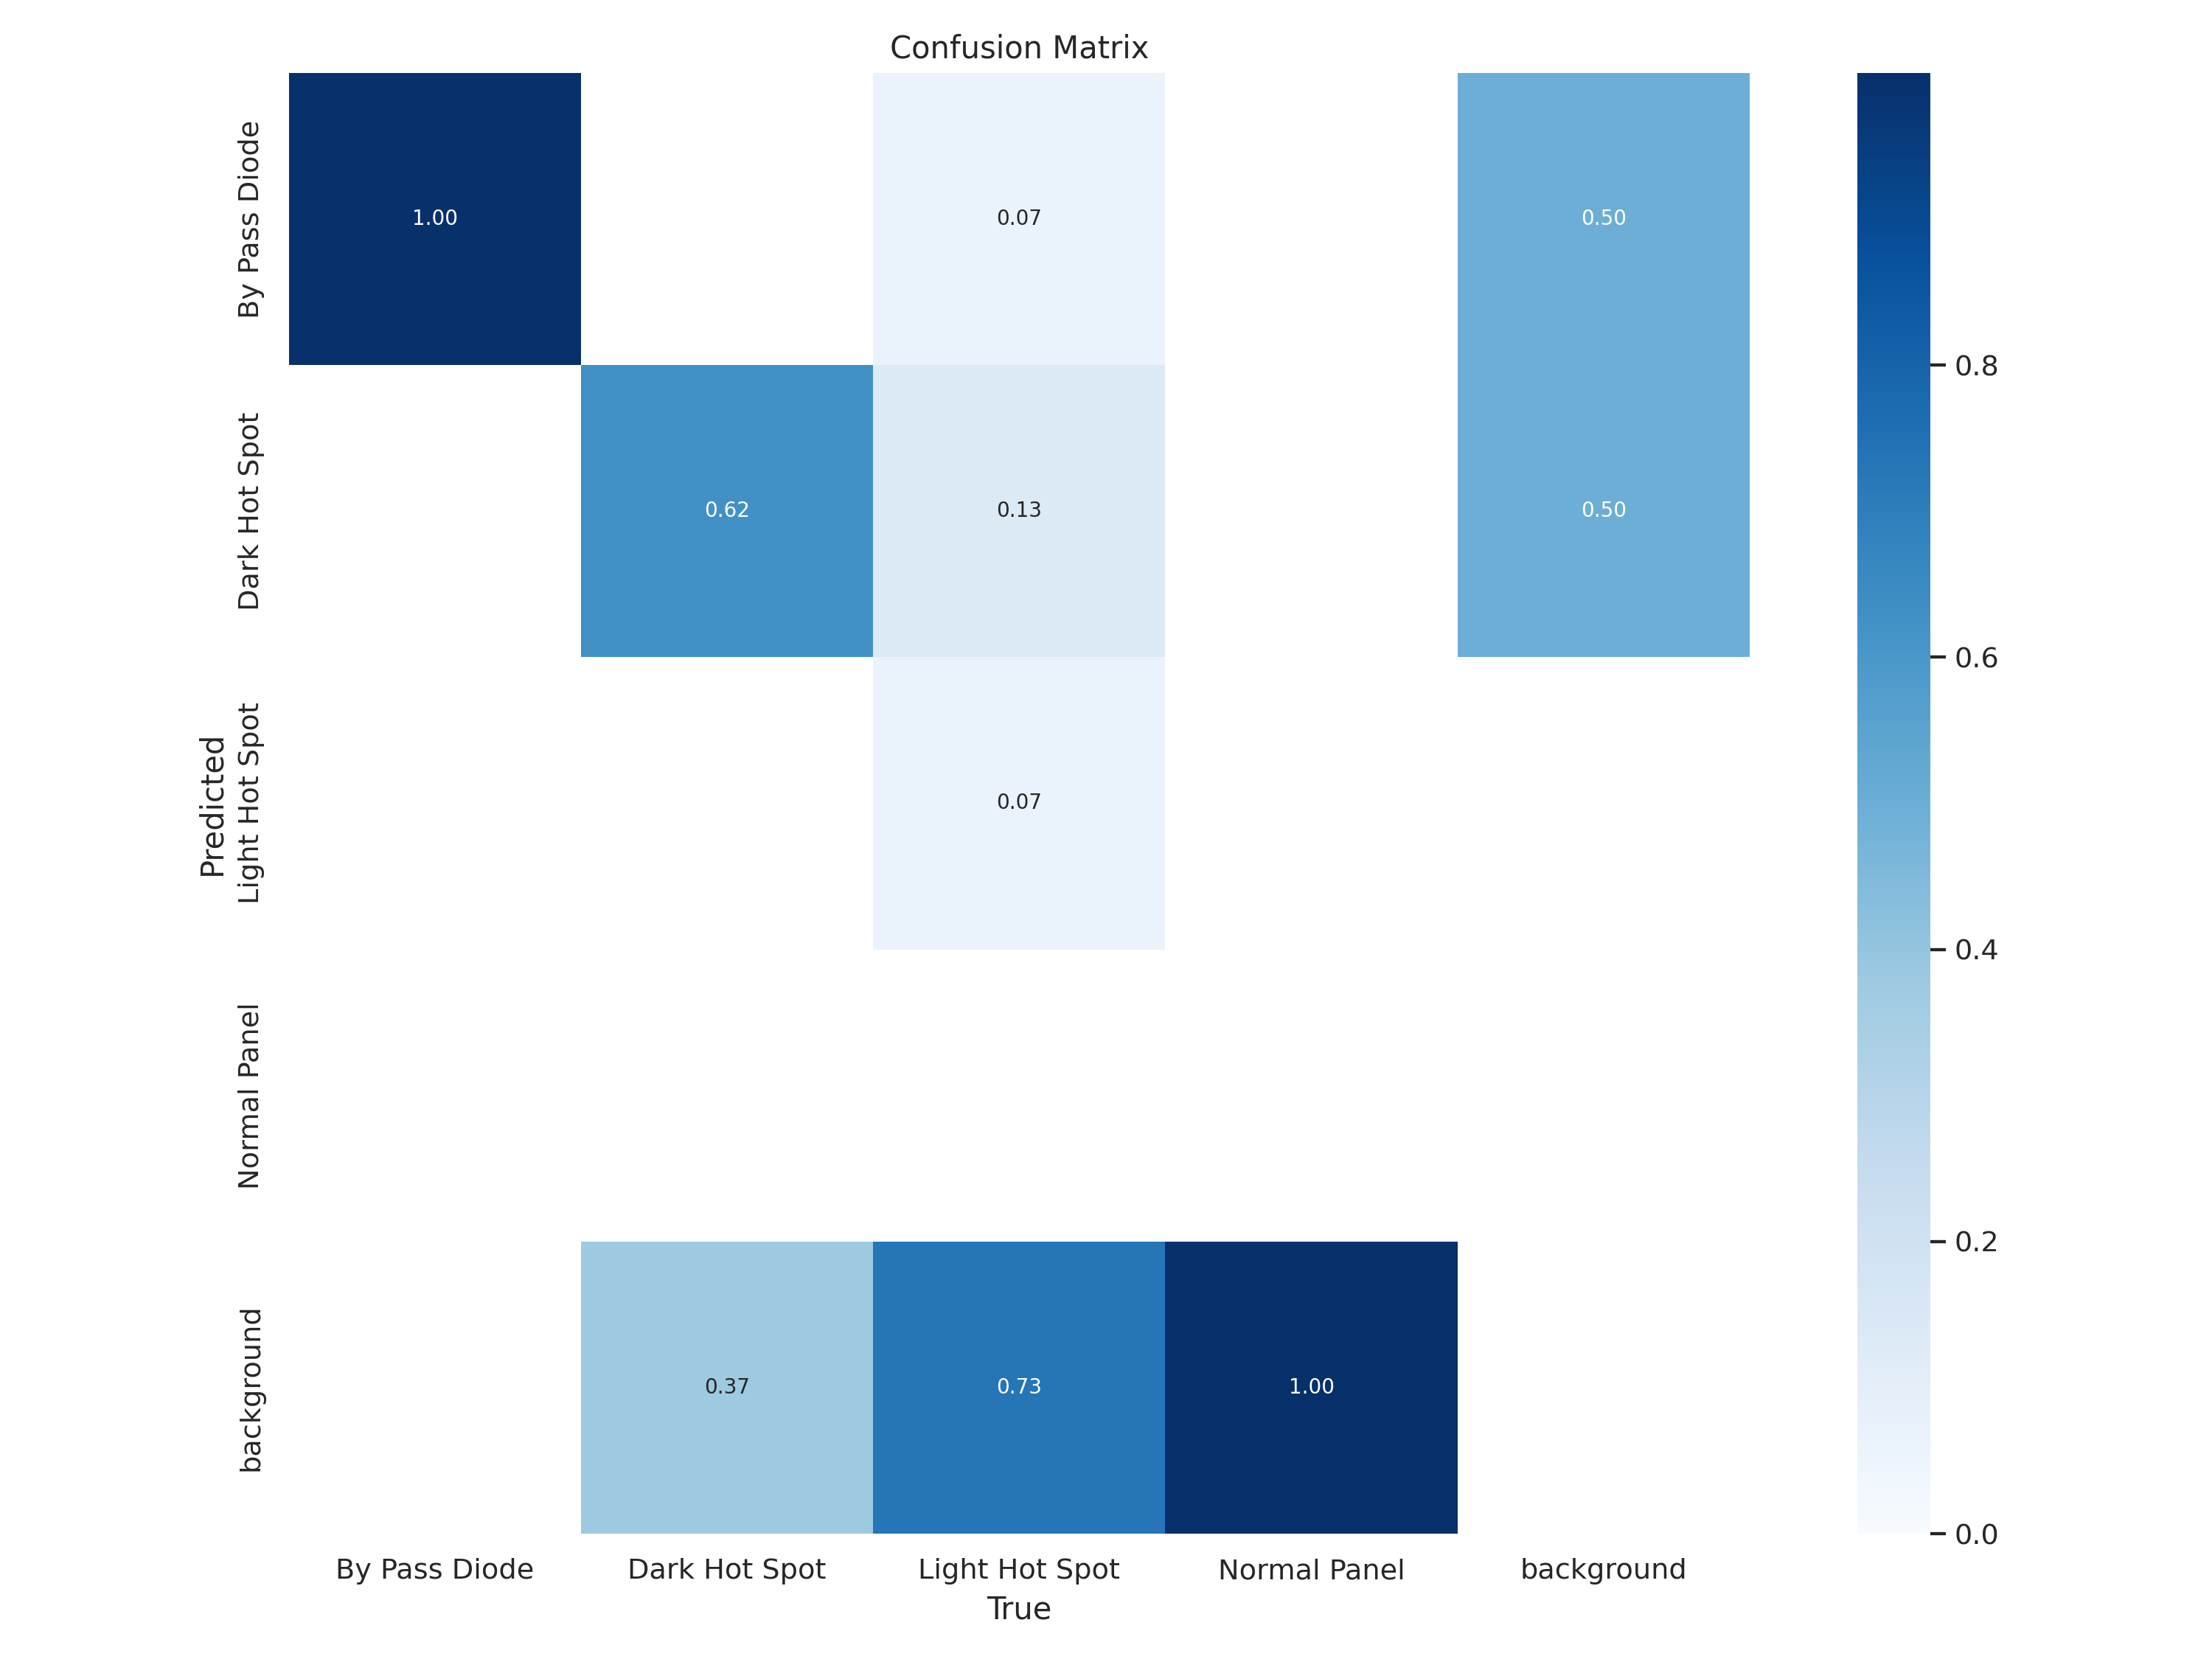

In [ ]:
# Confusion matrix for yolov8m-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=1000)

/content


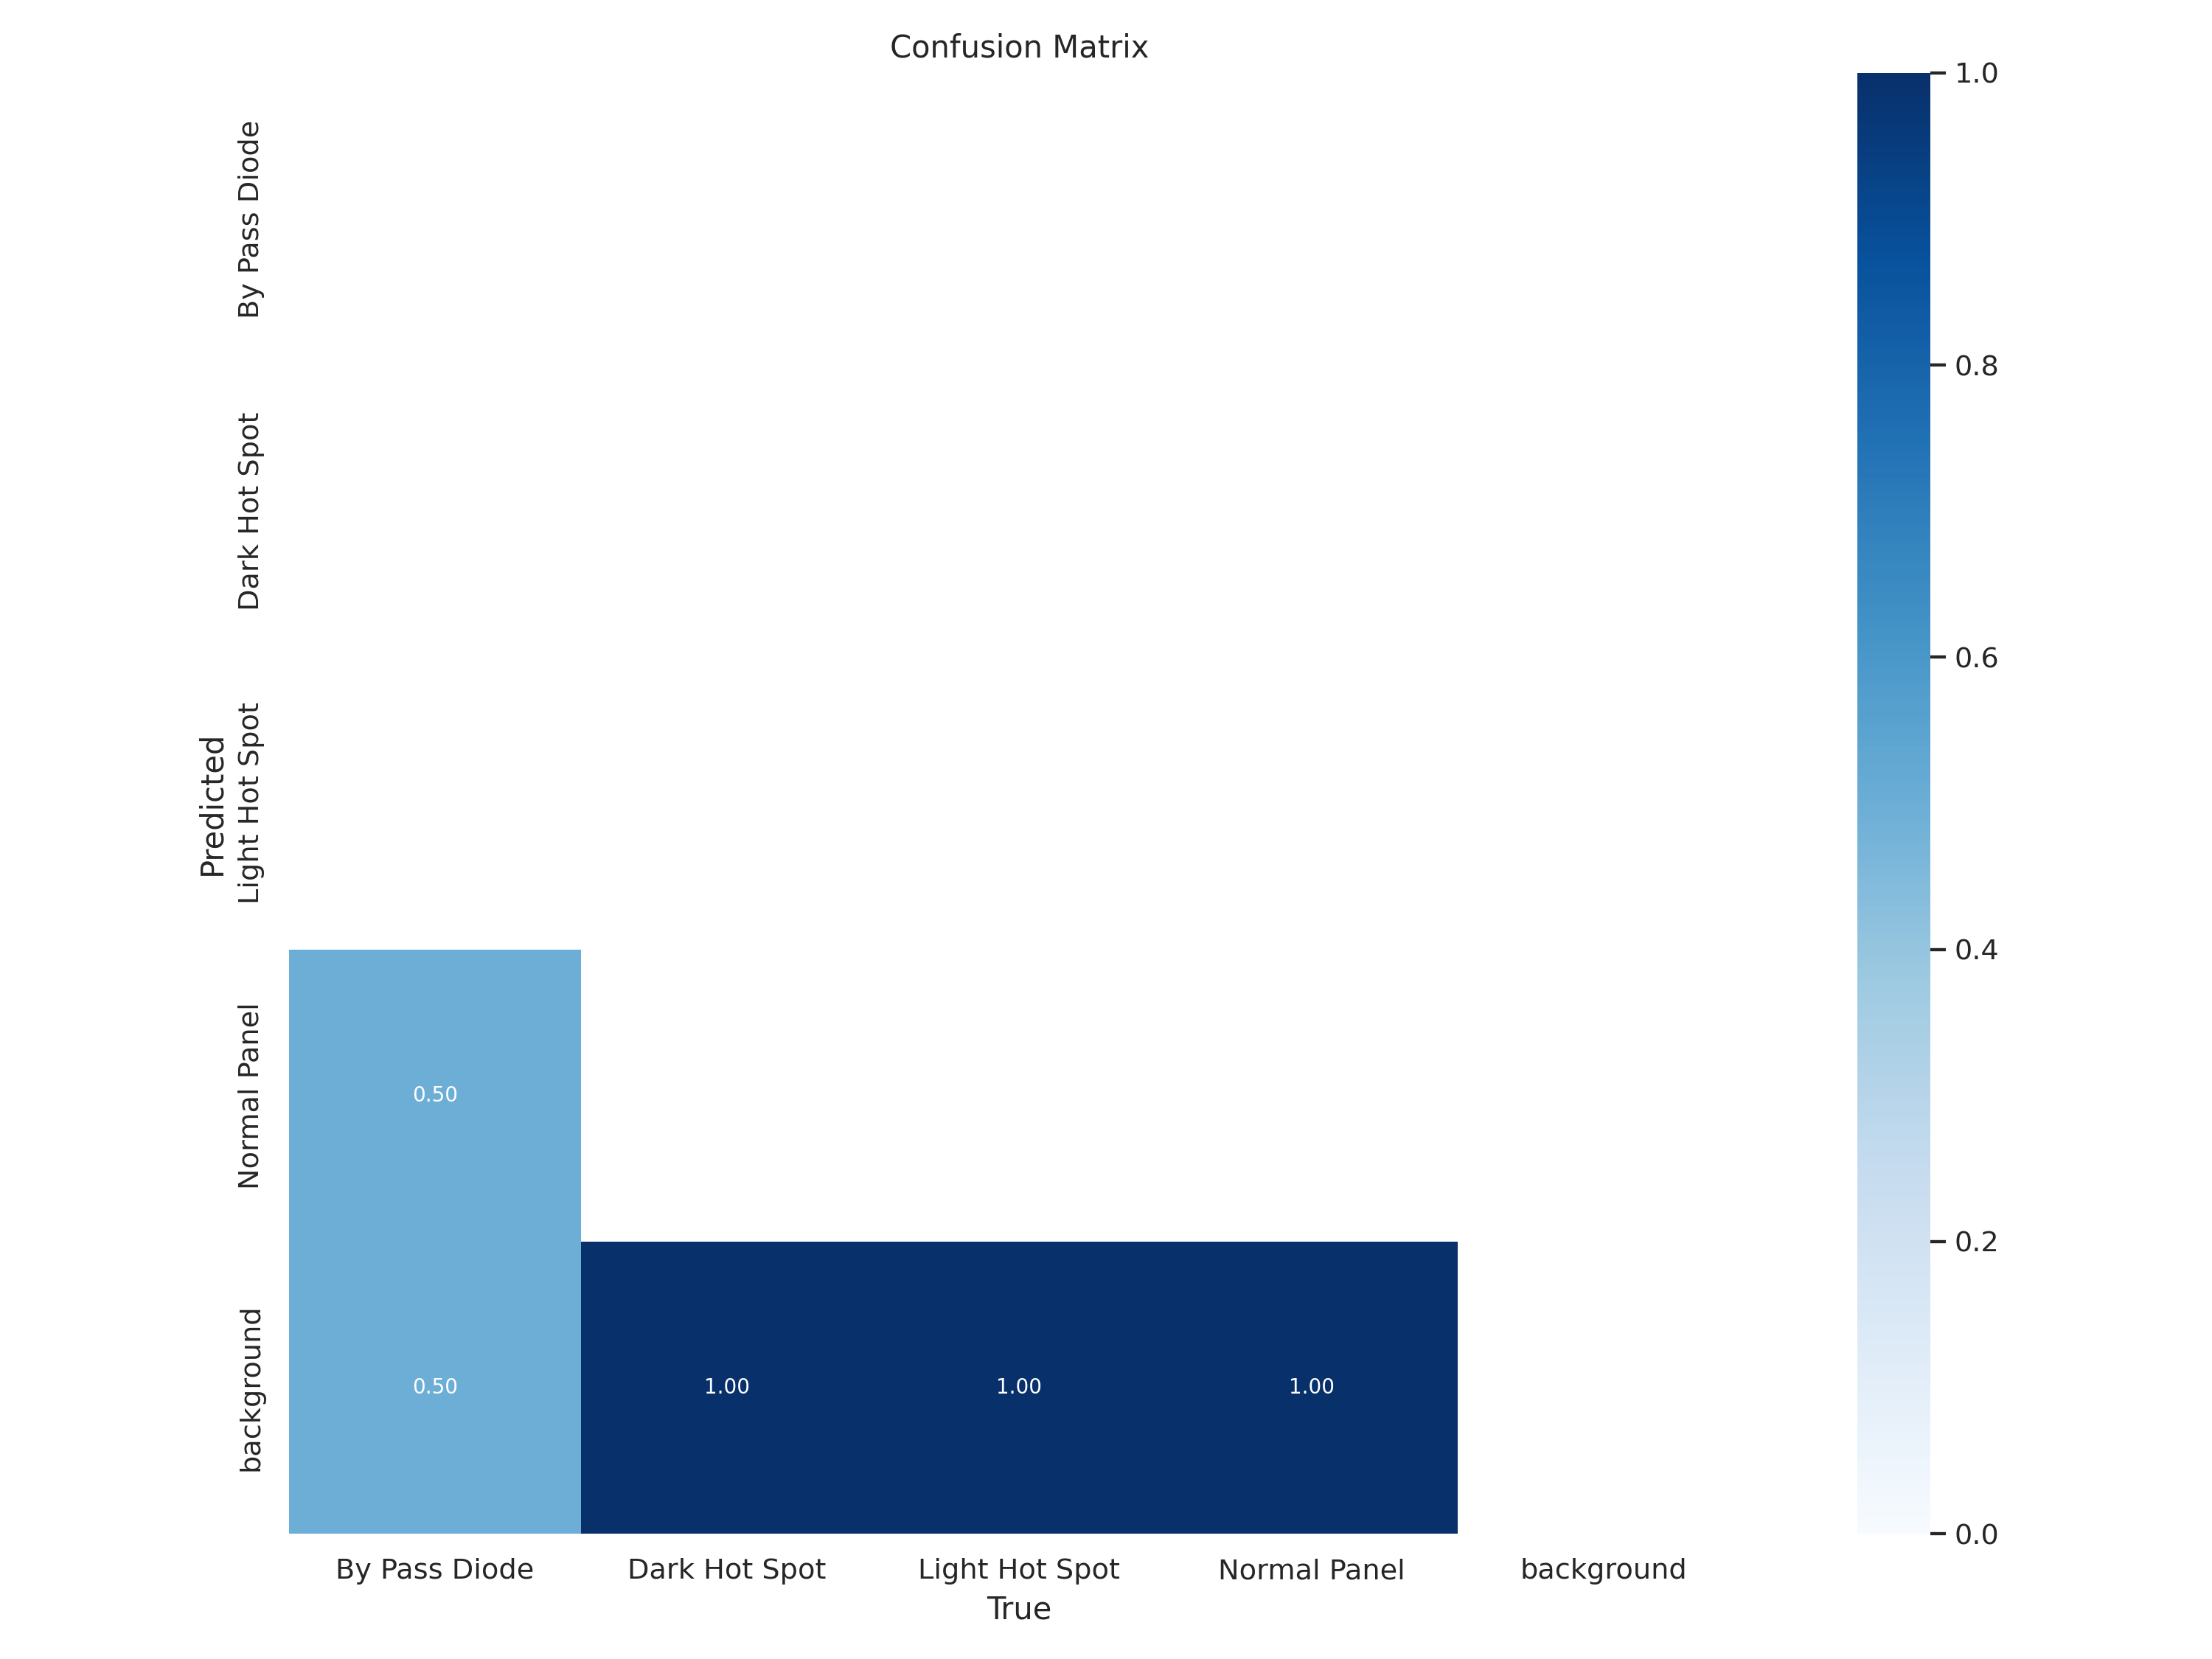

In [ ]:
# Confusion matrix for yolov8n-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/confusion_matrix.png', width=1000)

/content


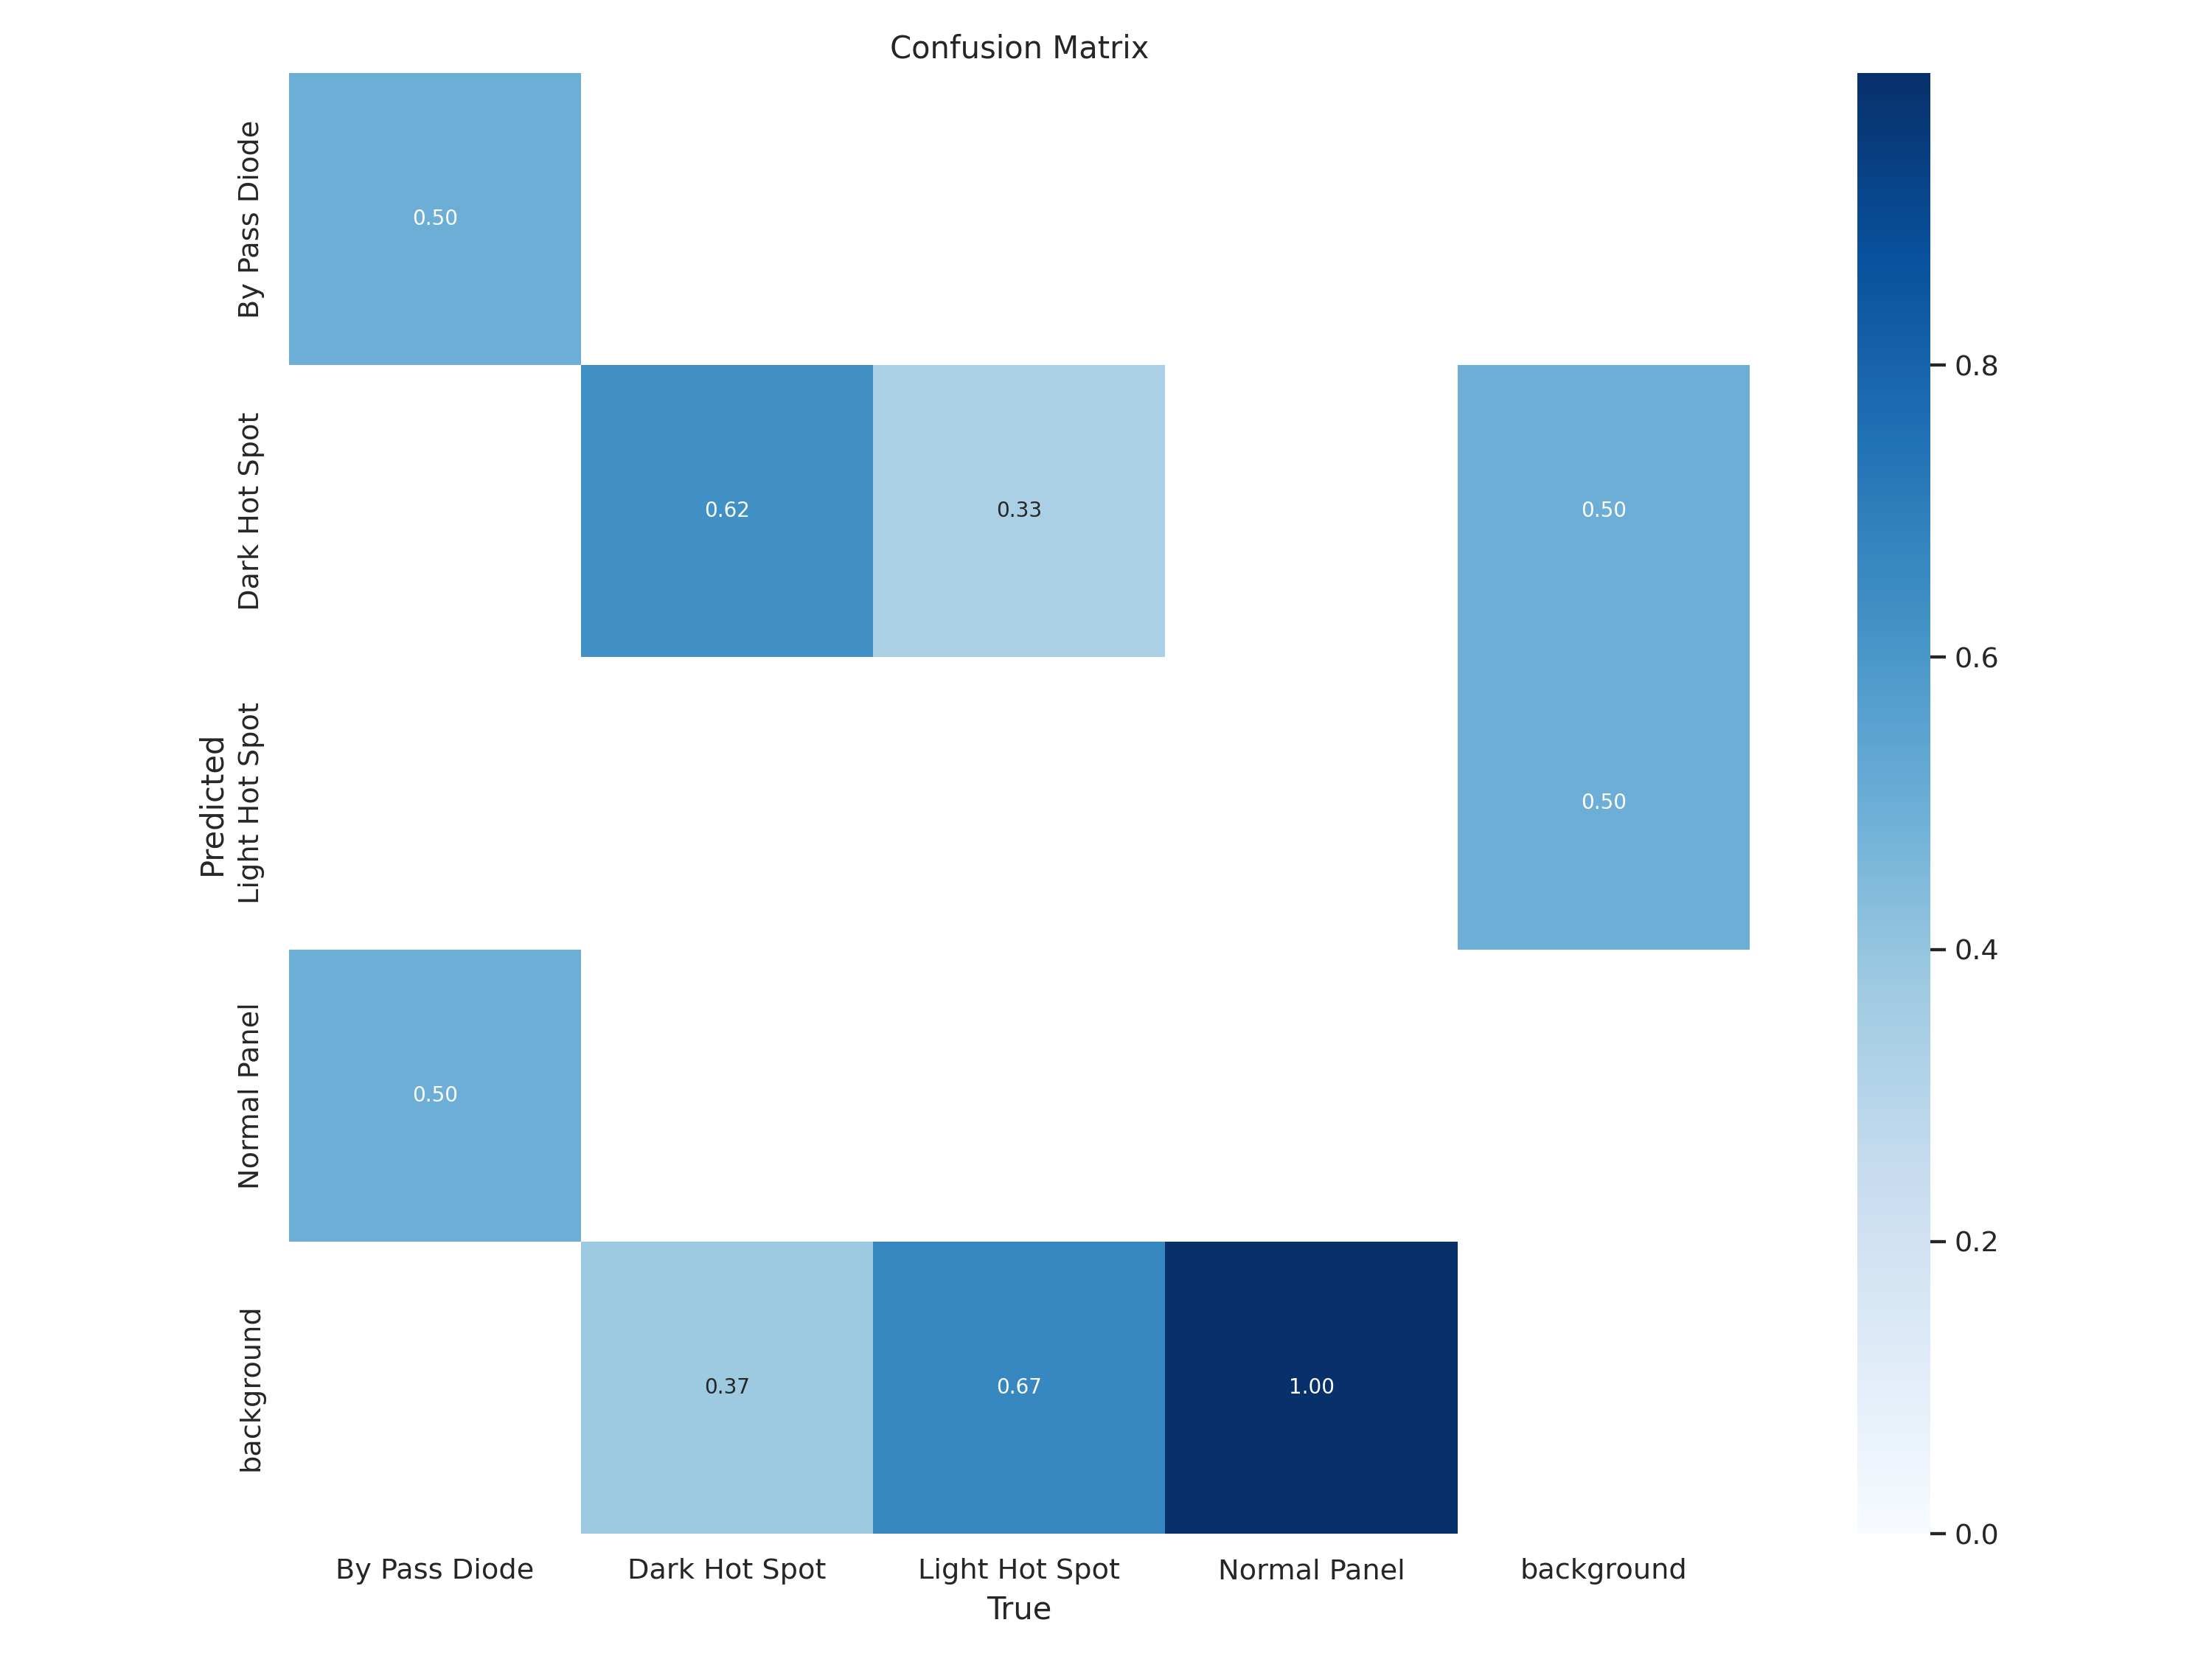

In [6]:
# Confusion matrix for yolov8x-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=1000)

/content


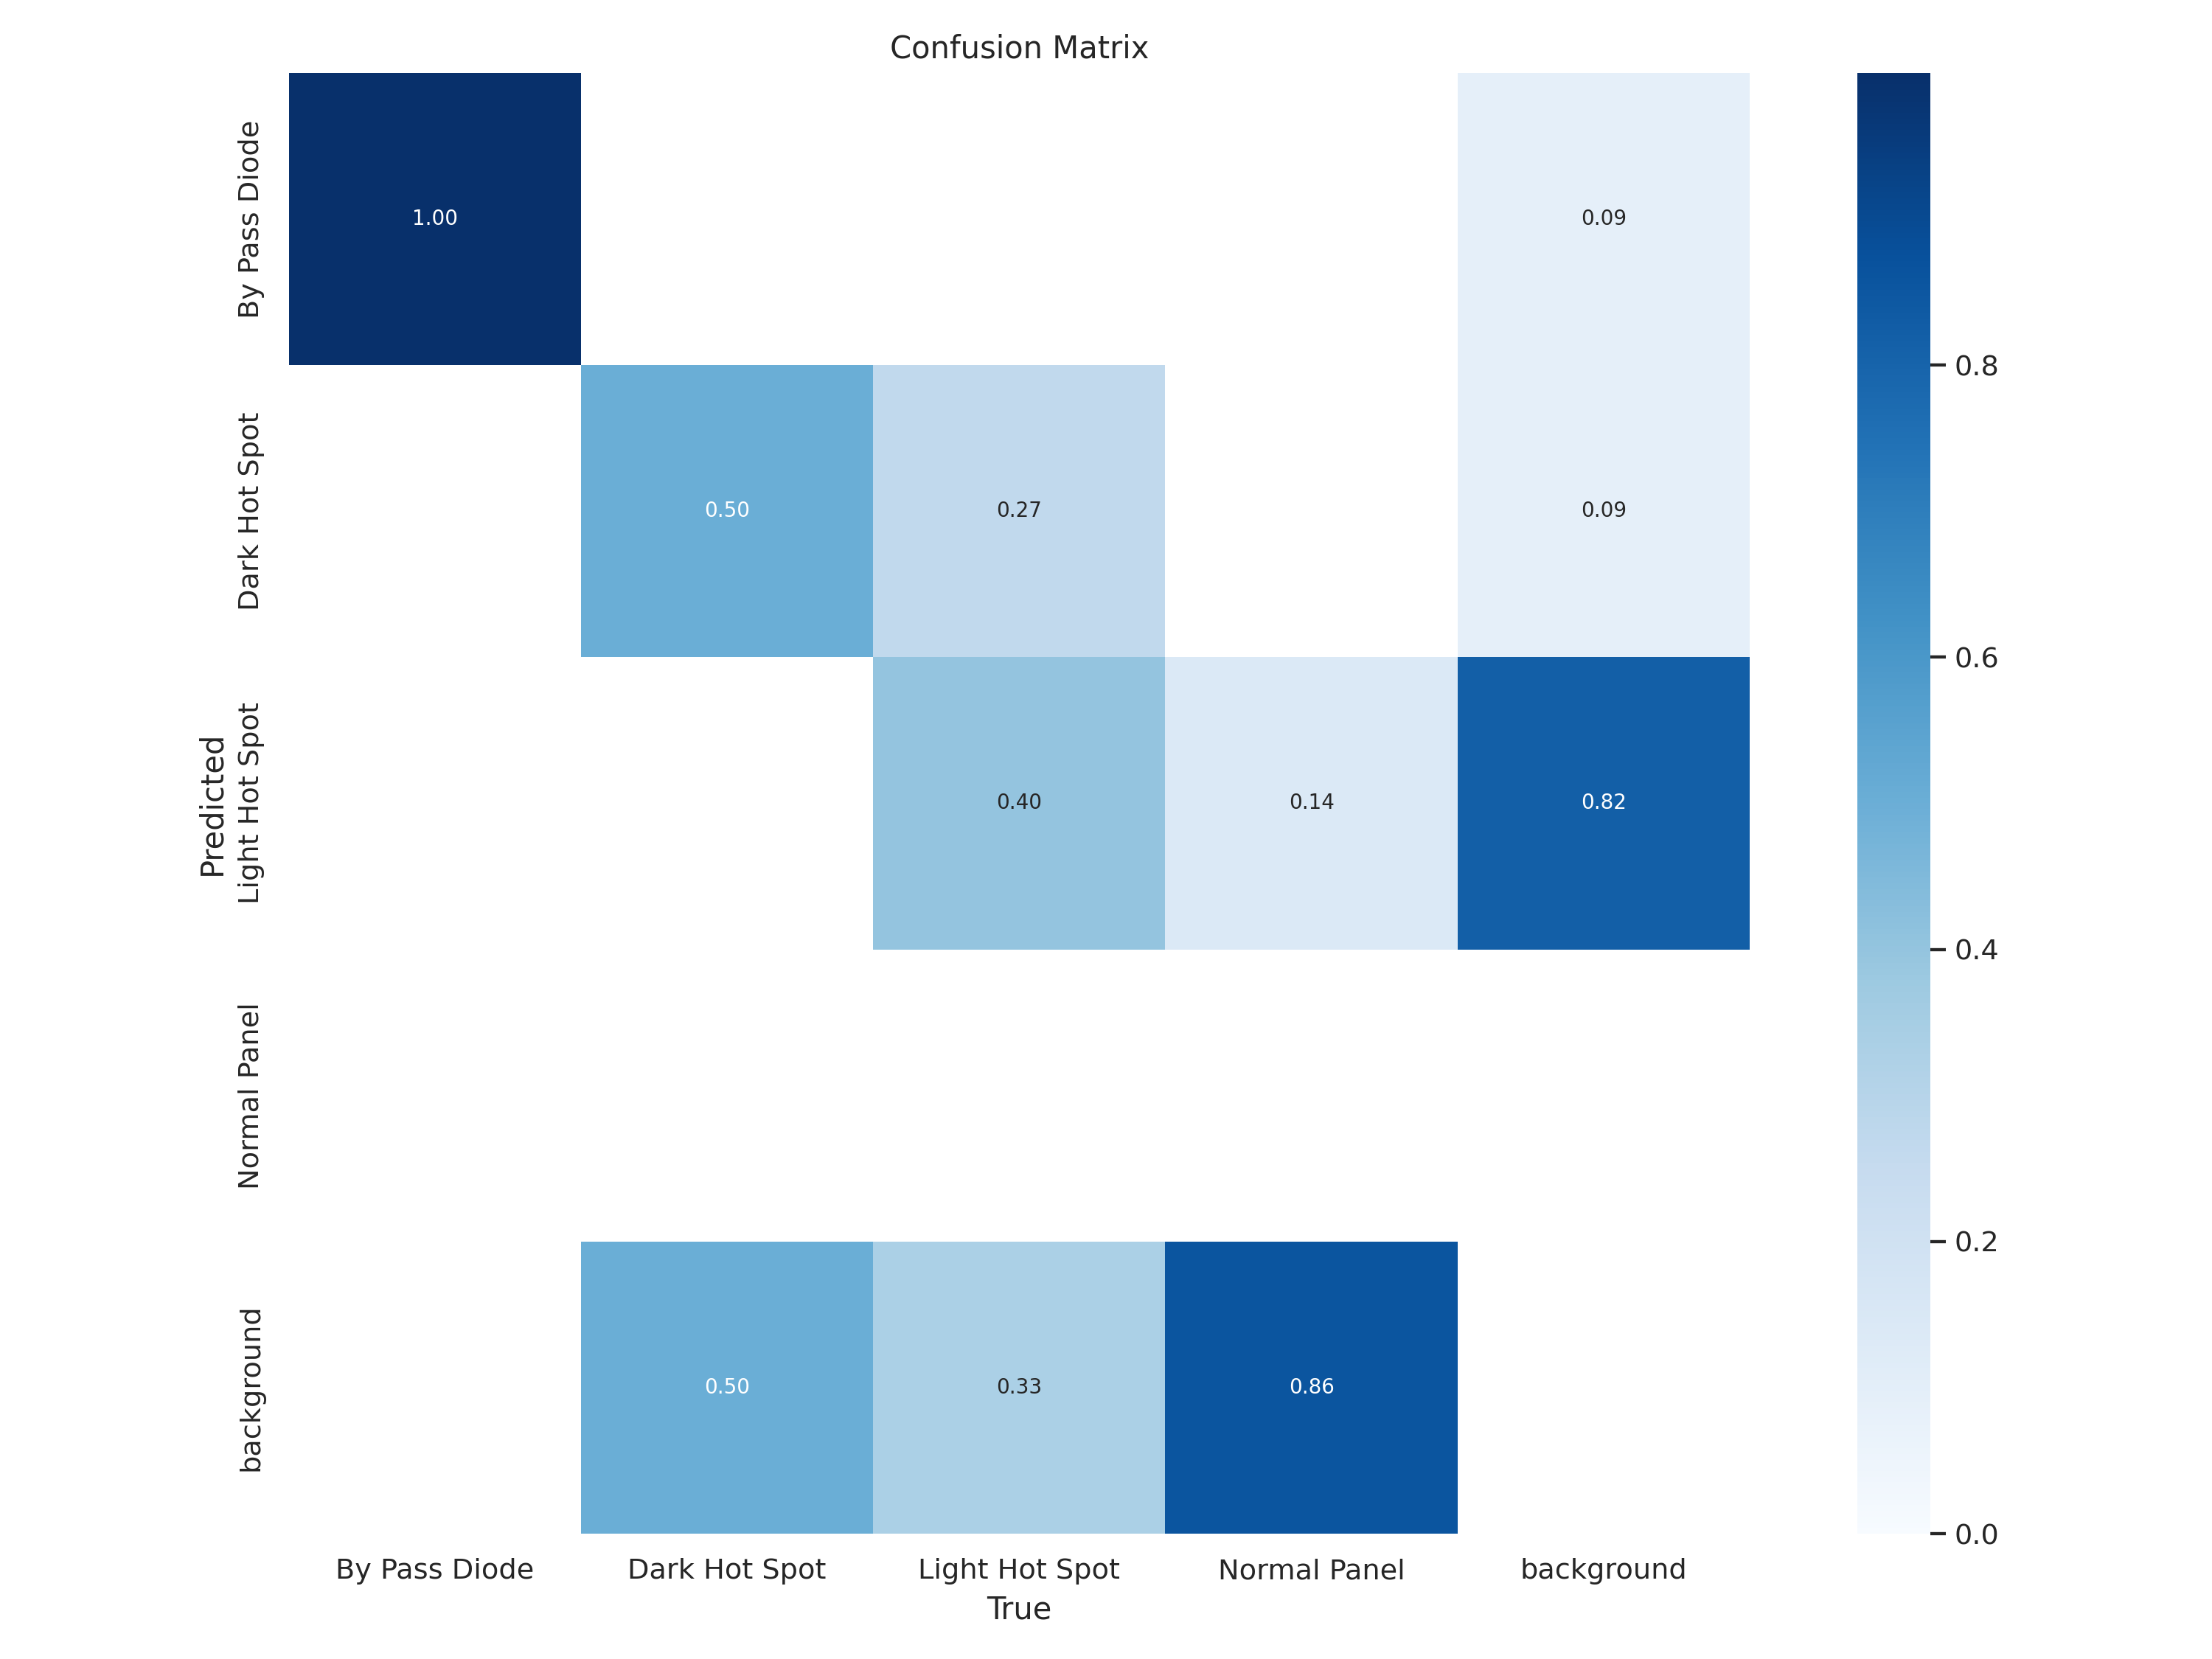

In [10]:
# Confusion matrix for yolov8m-seg.pt when epoch = 40.

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=1000)

/content


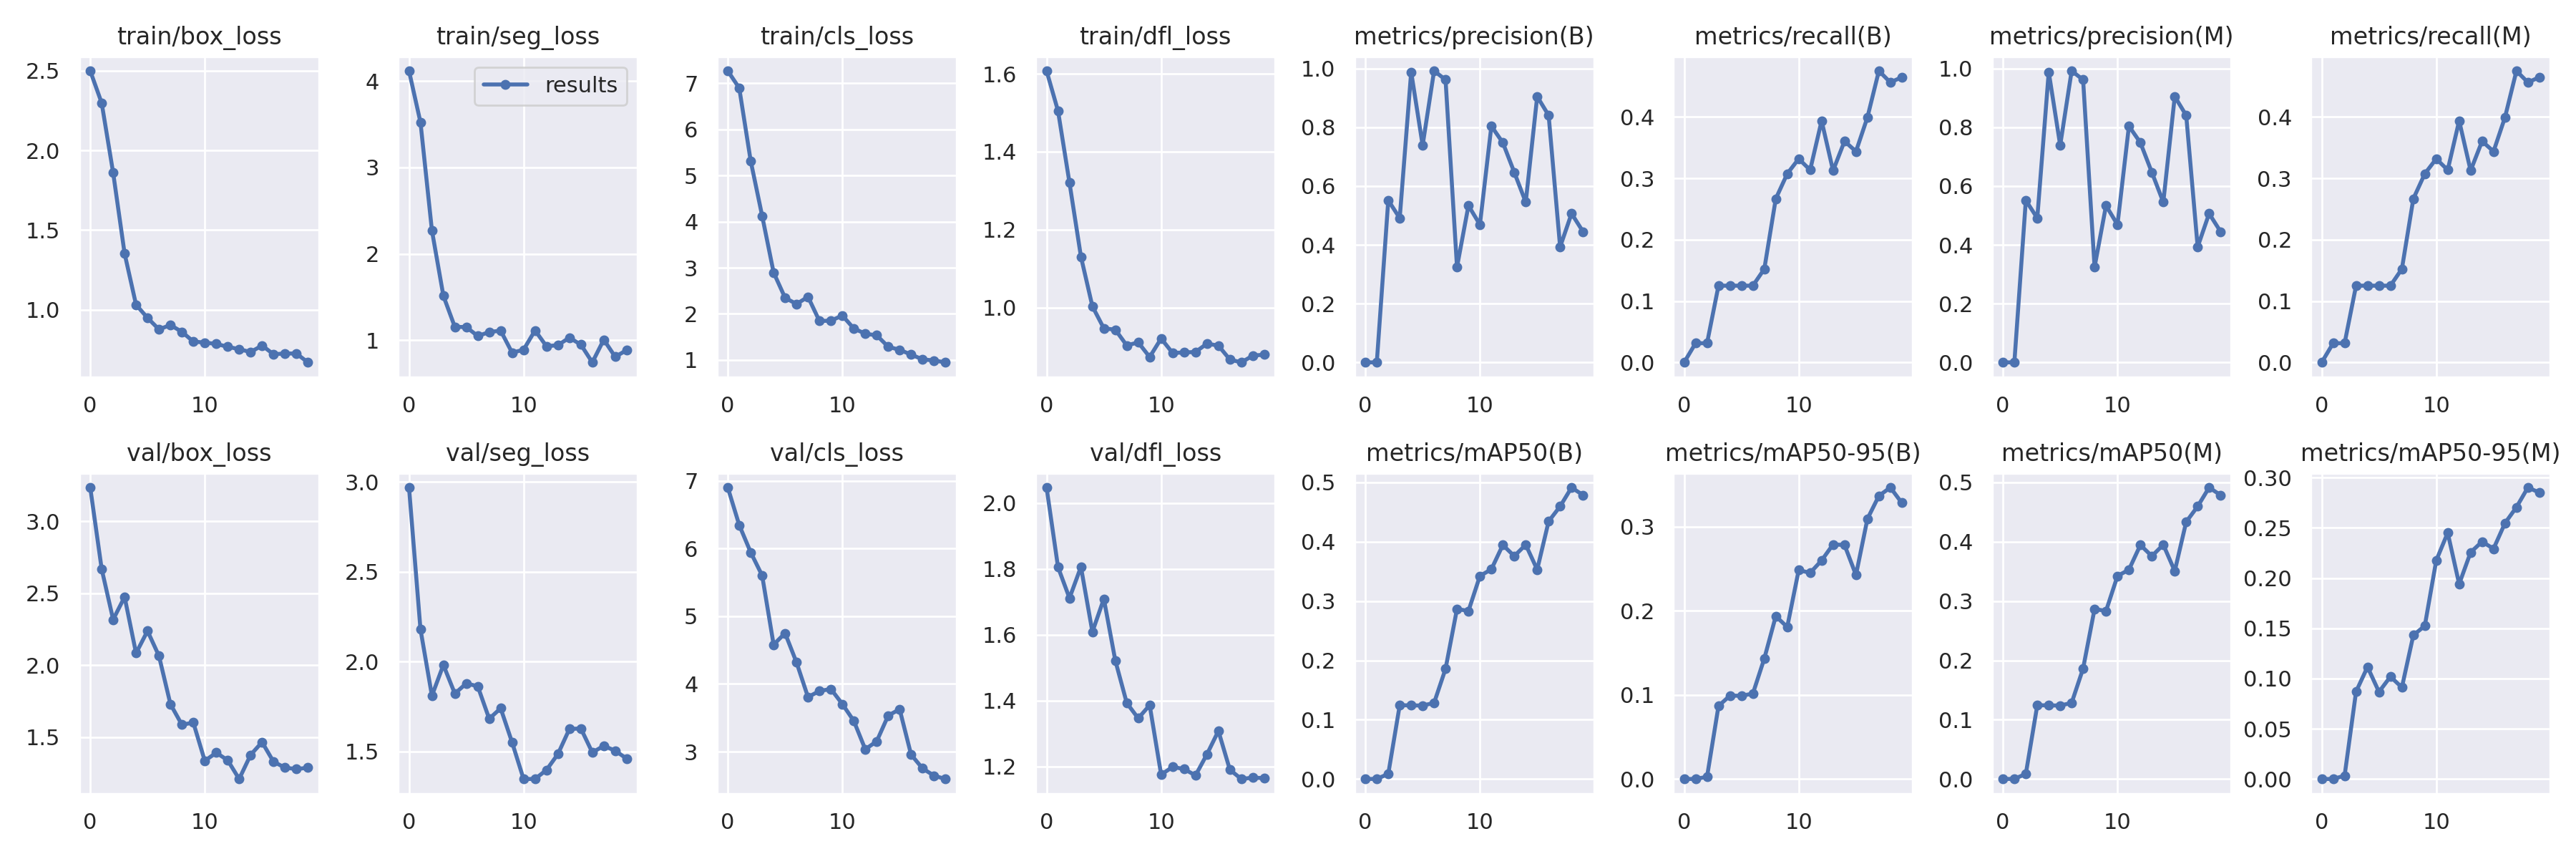

In [ ]:
# Graphs for yolov8s-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

/content


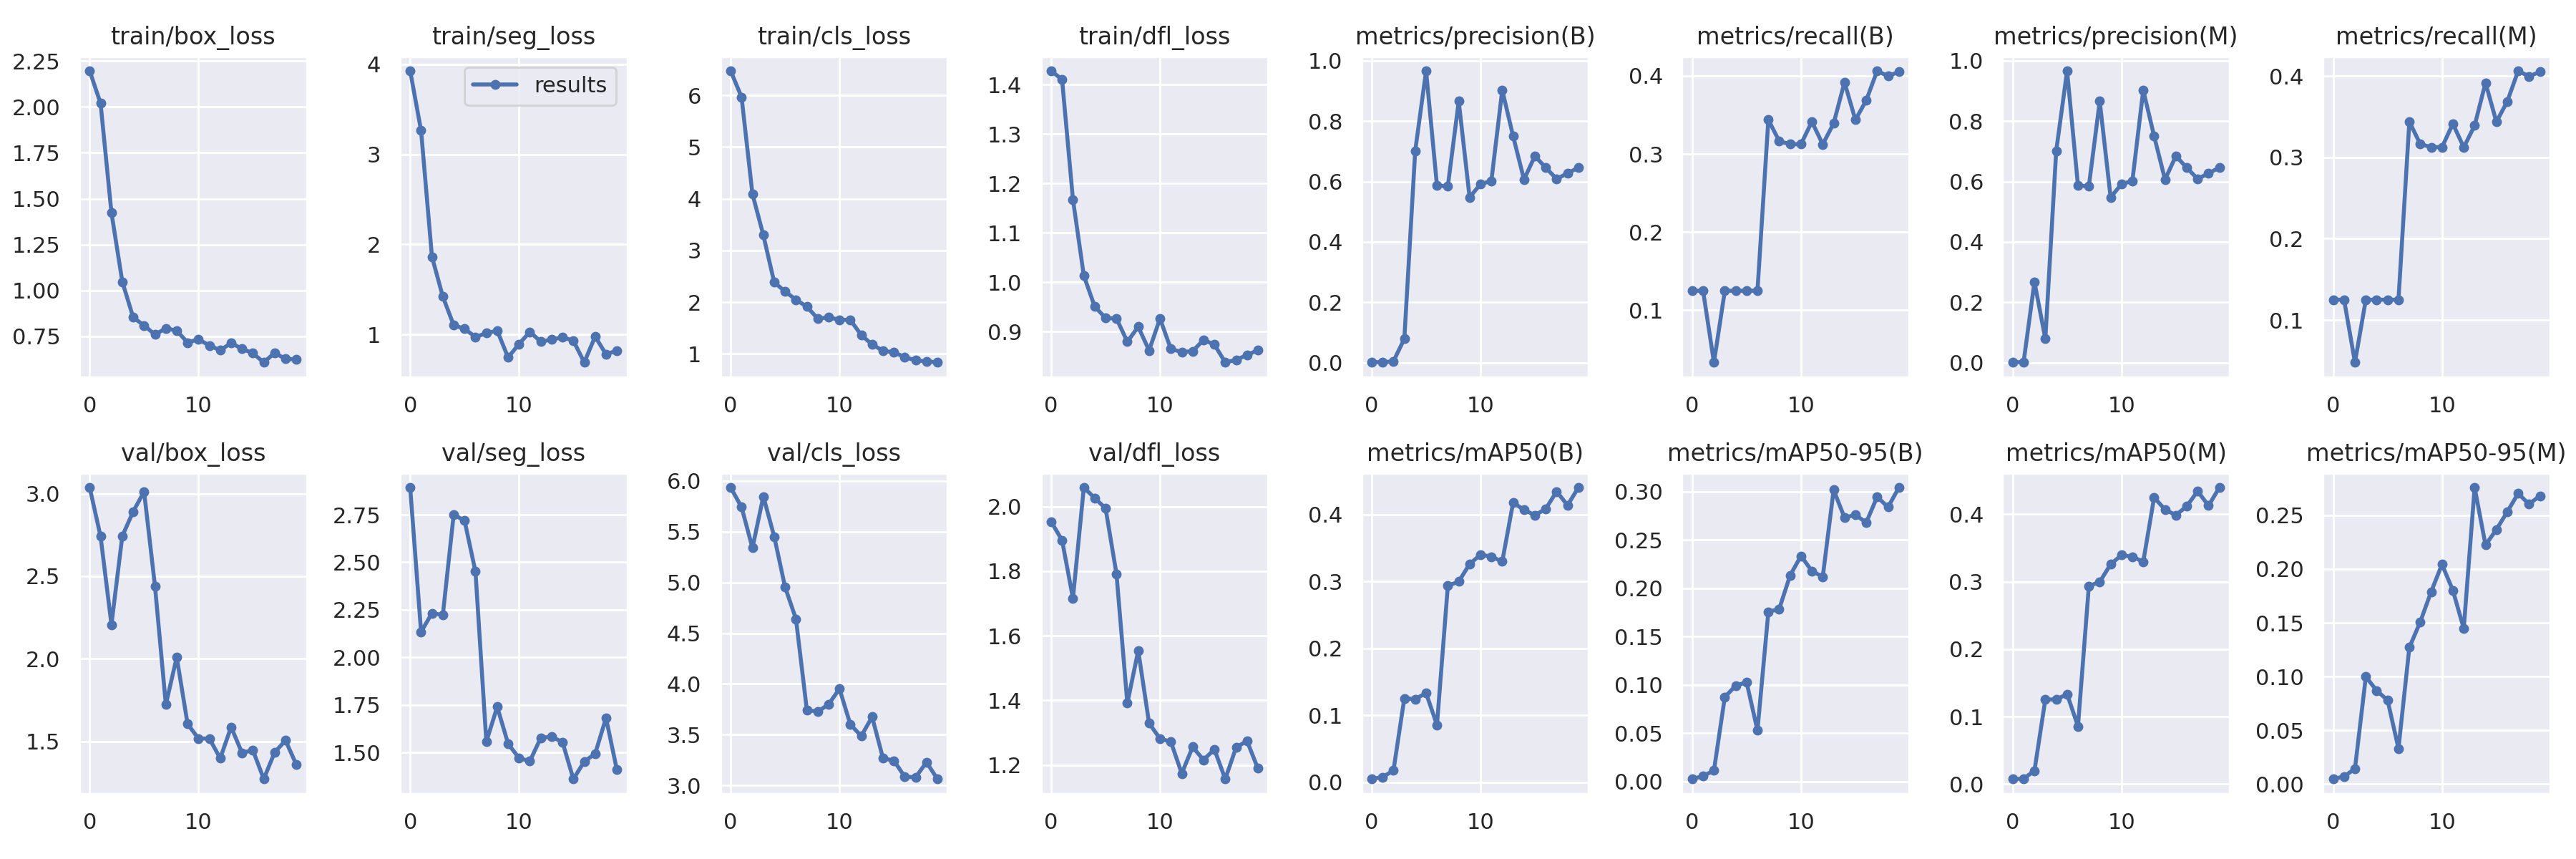

In [ ]:
# Graphs for yolov8m-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=1000)

/content


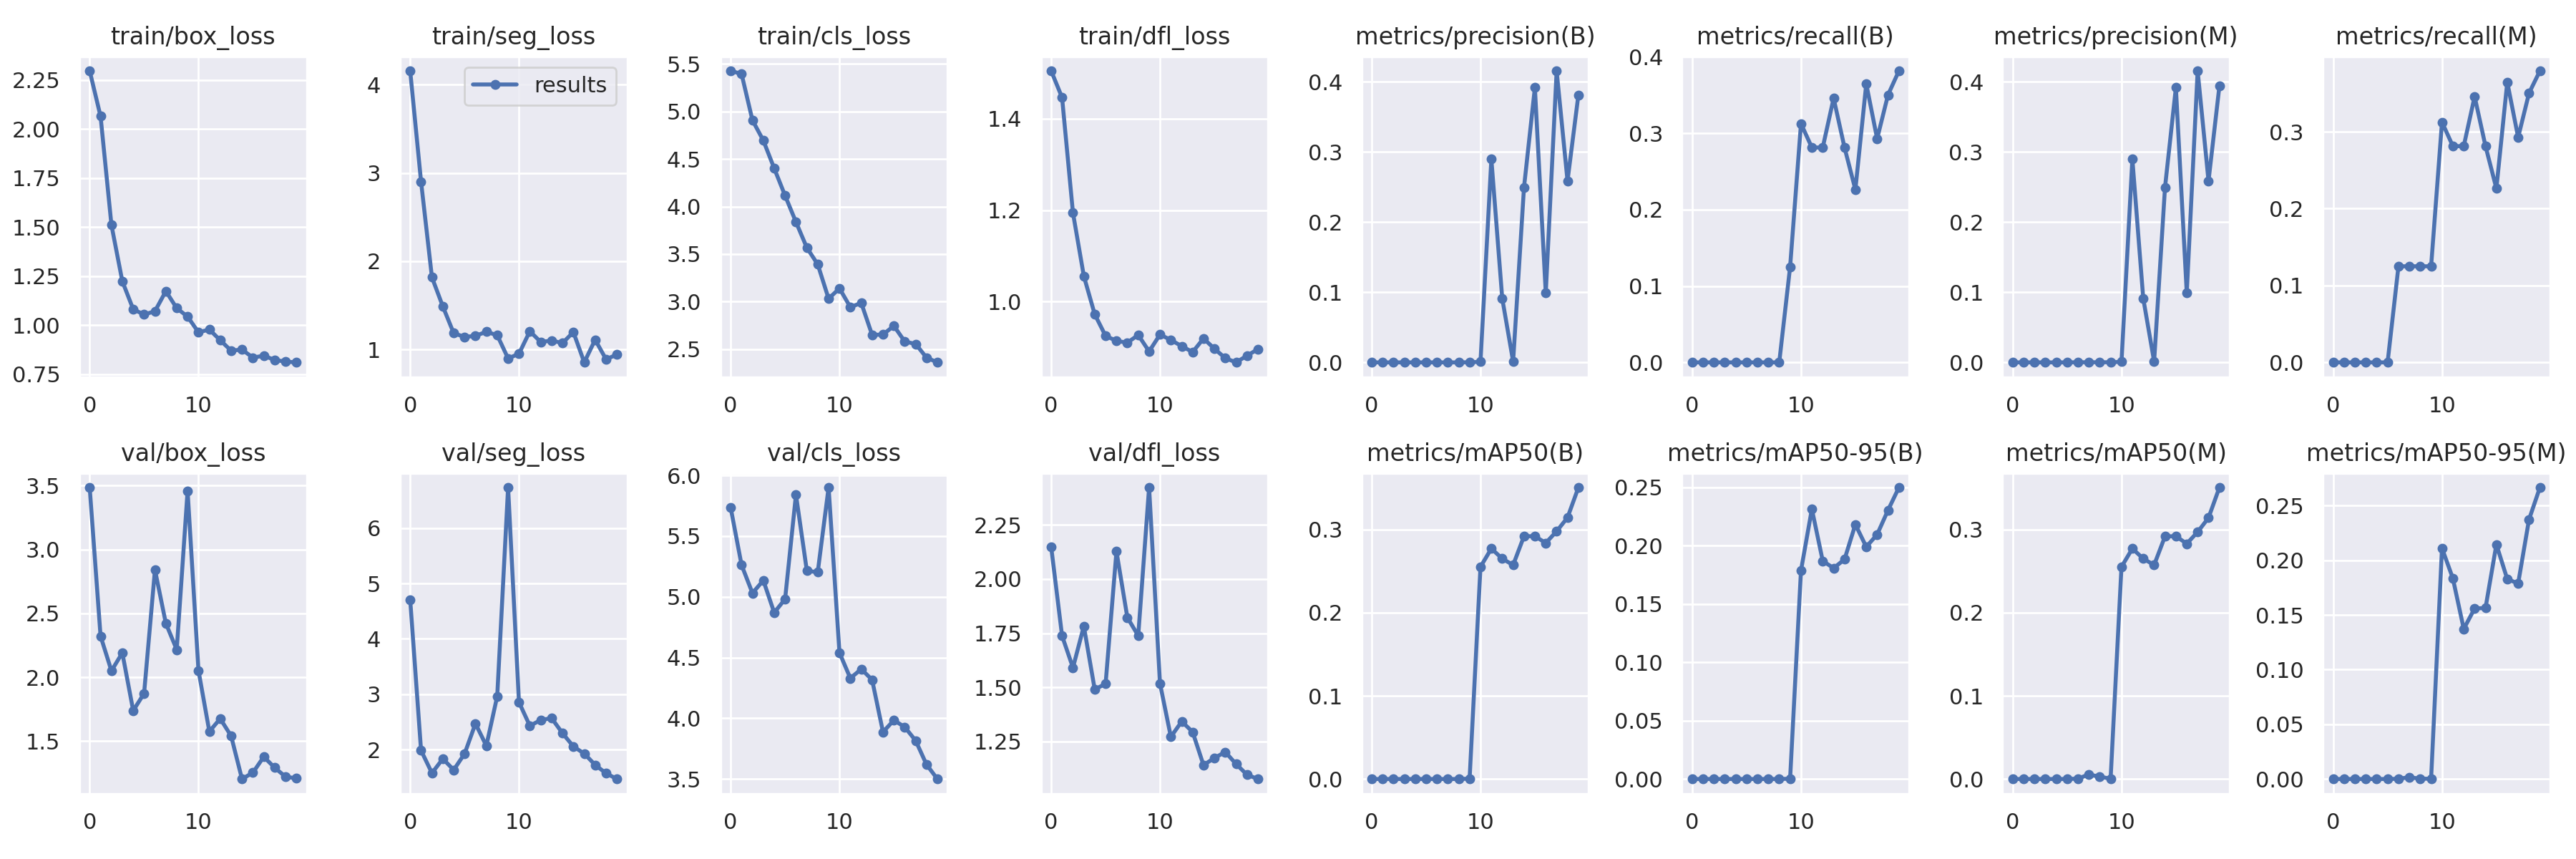

In [ ]:
# Graphs for yolov8n-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/results.png', width=1000)

/content


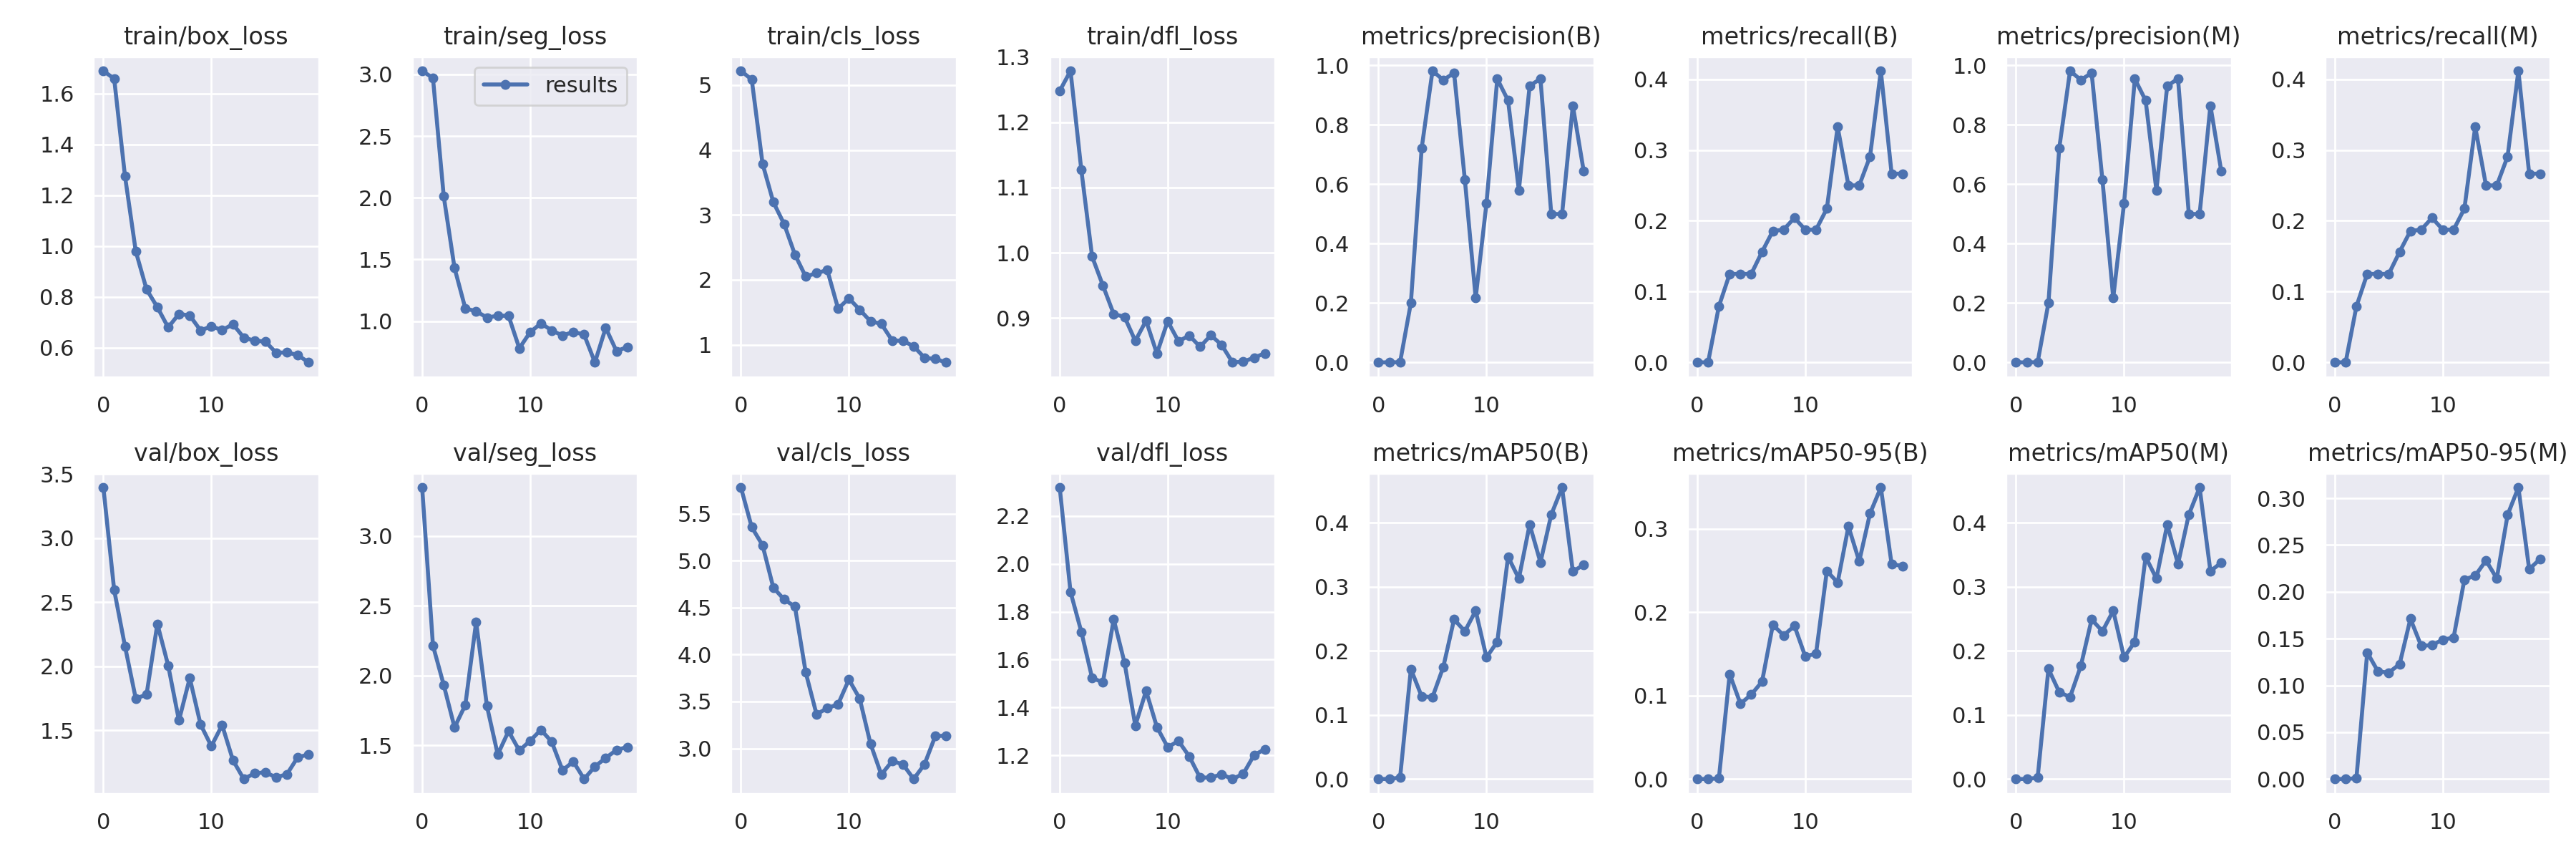

In [7]:
# Graphs for yolov8x-seg.pt

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1000)

/content


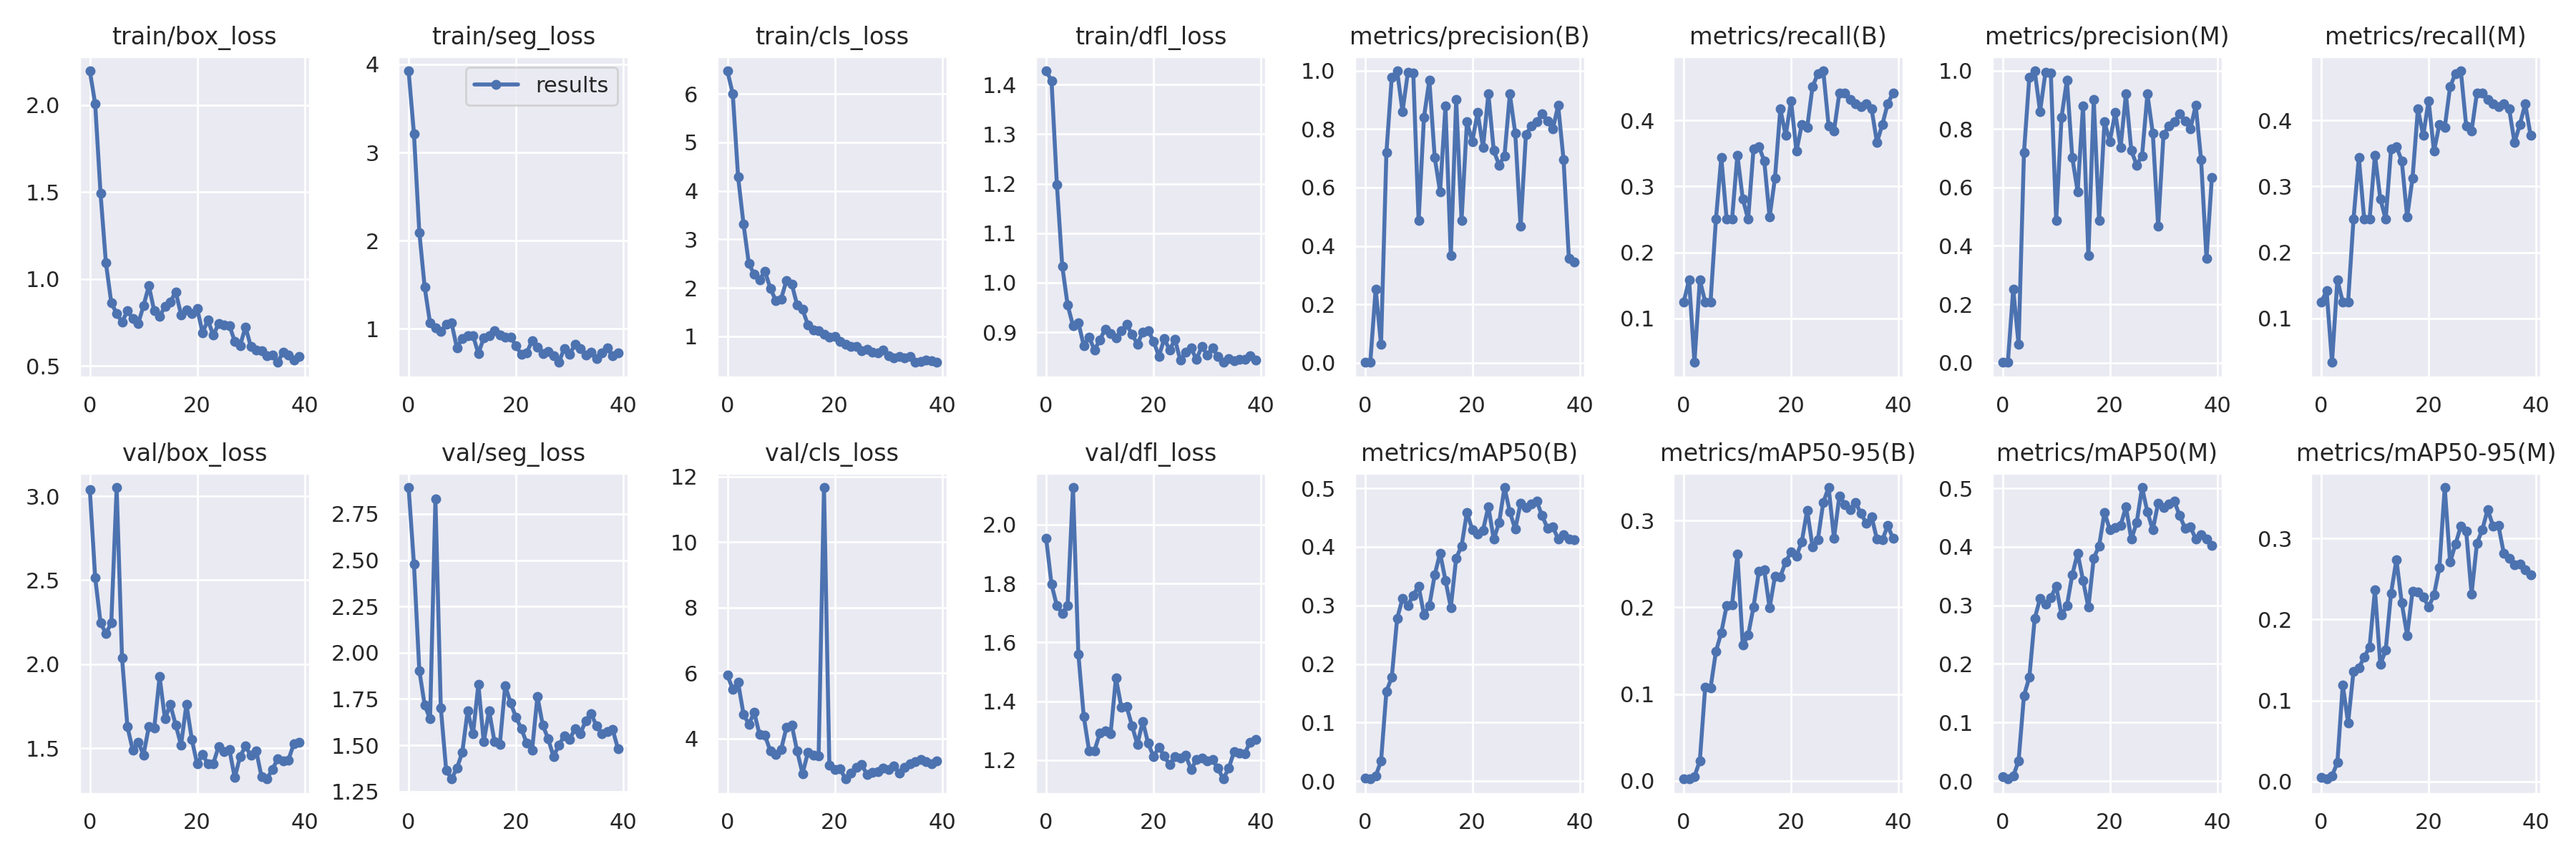

In [11]:
# Graphs for yolov8m-seg.pt with epoch = 40.

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=1000)

/content


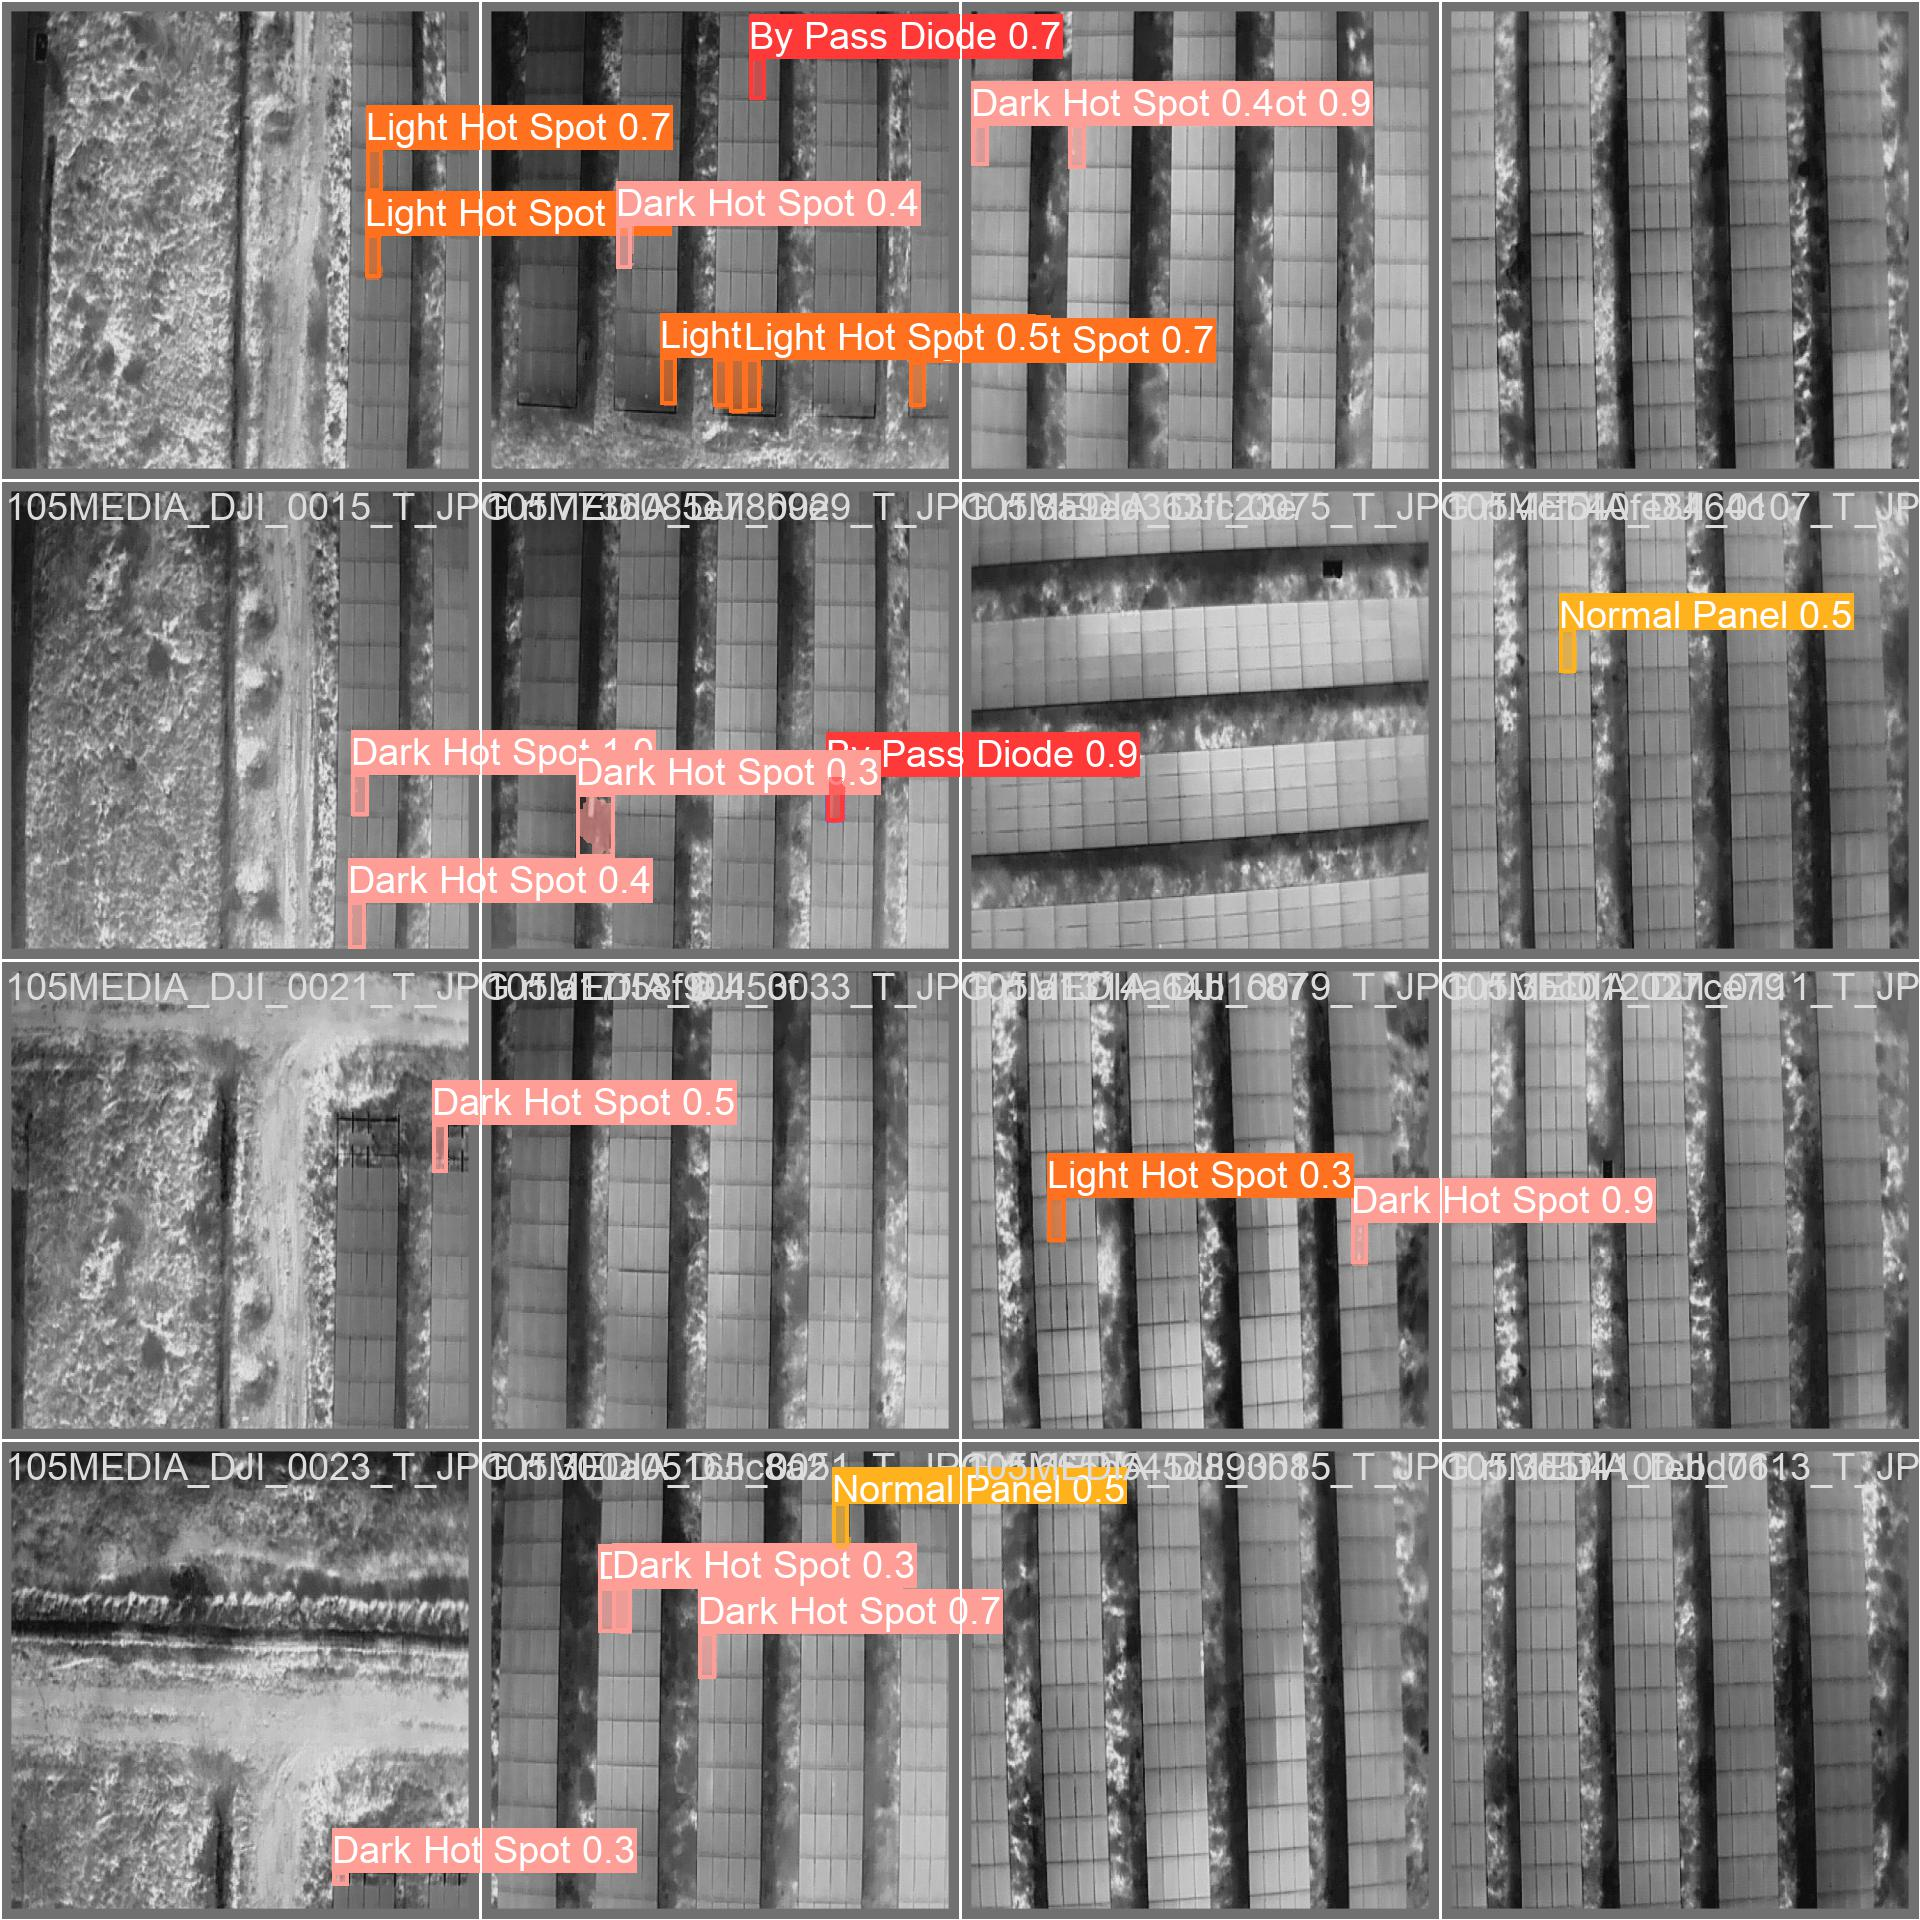

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

/content


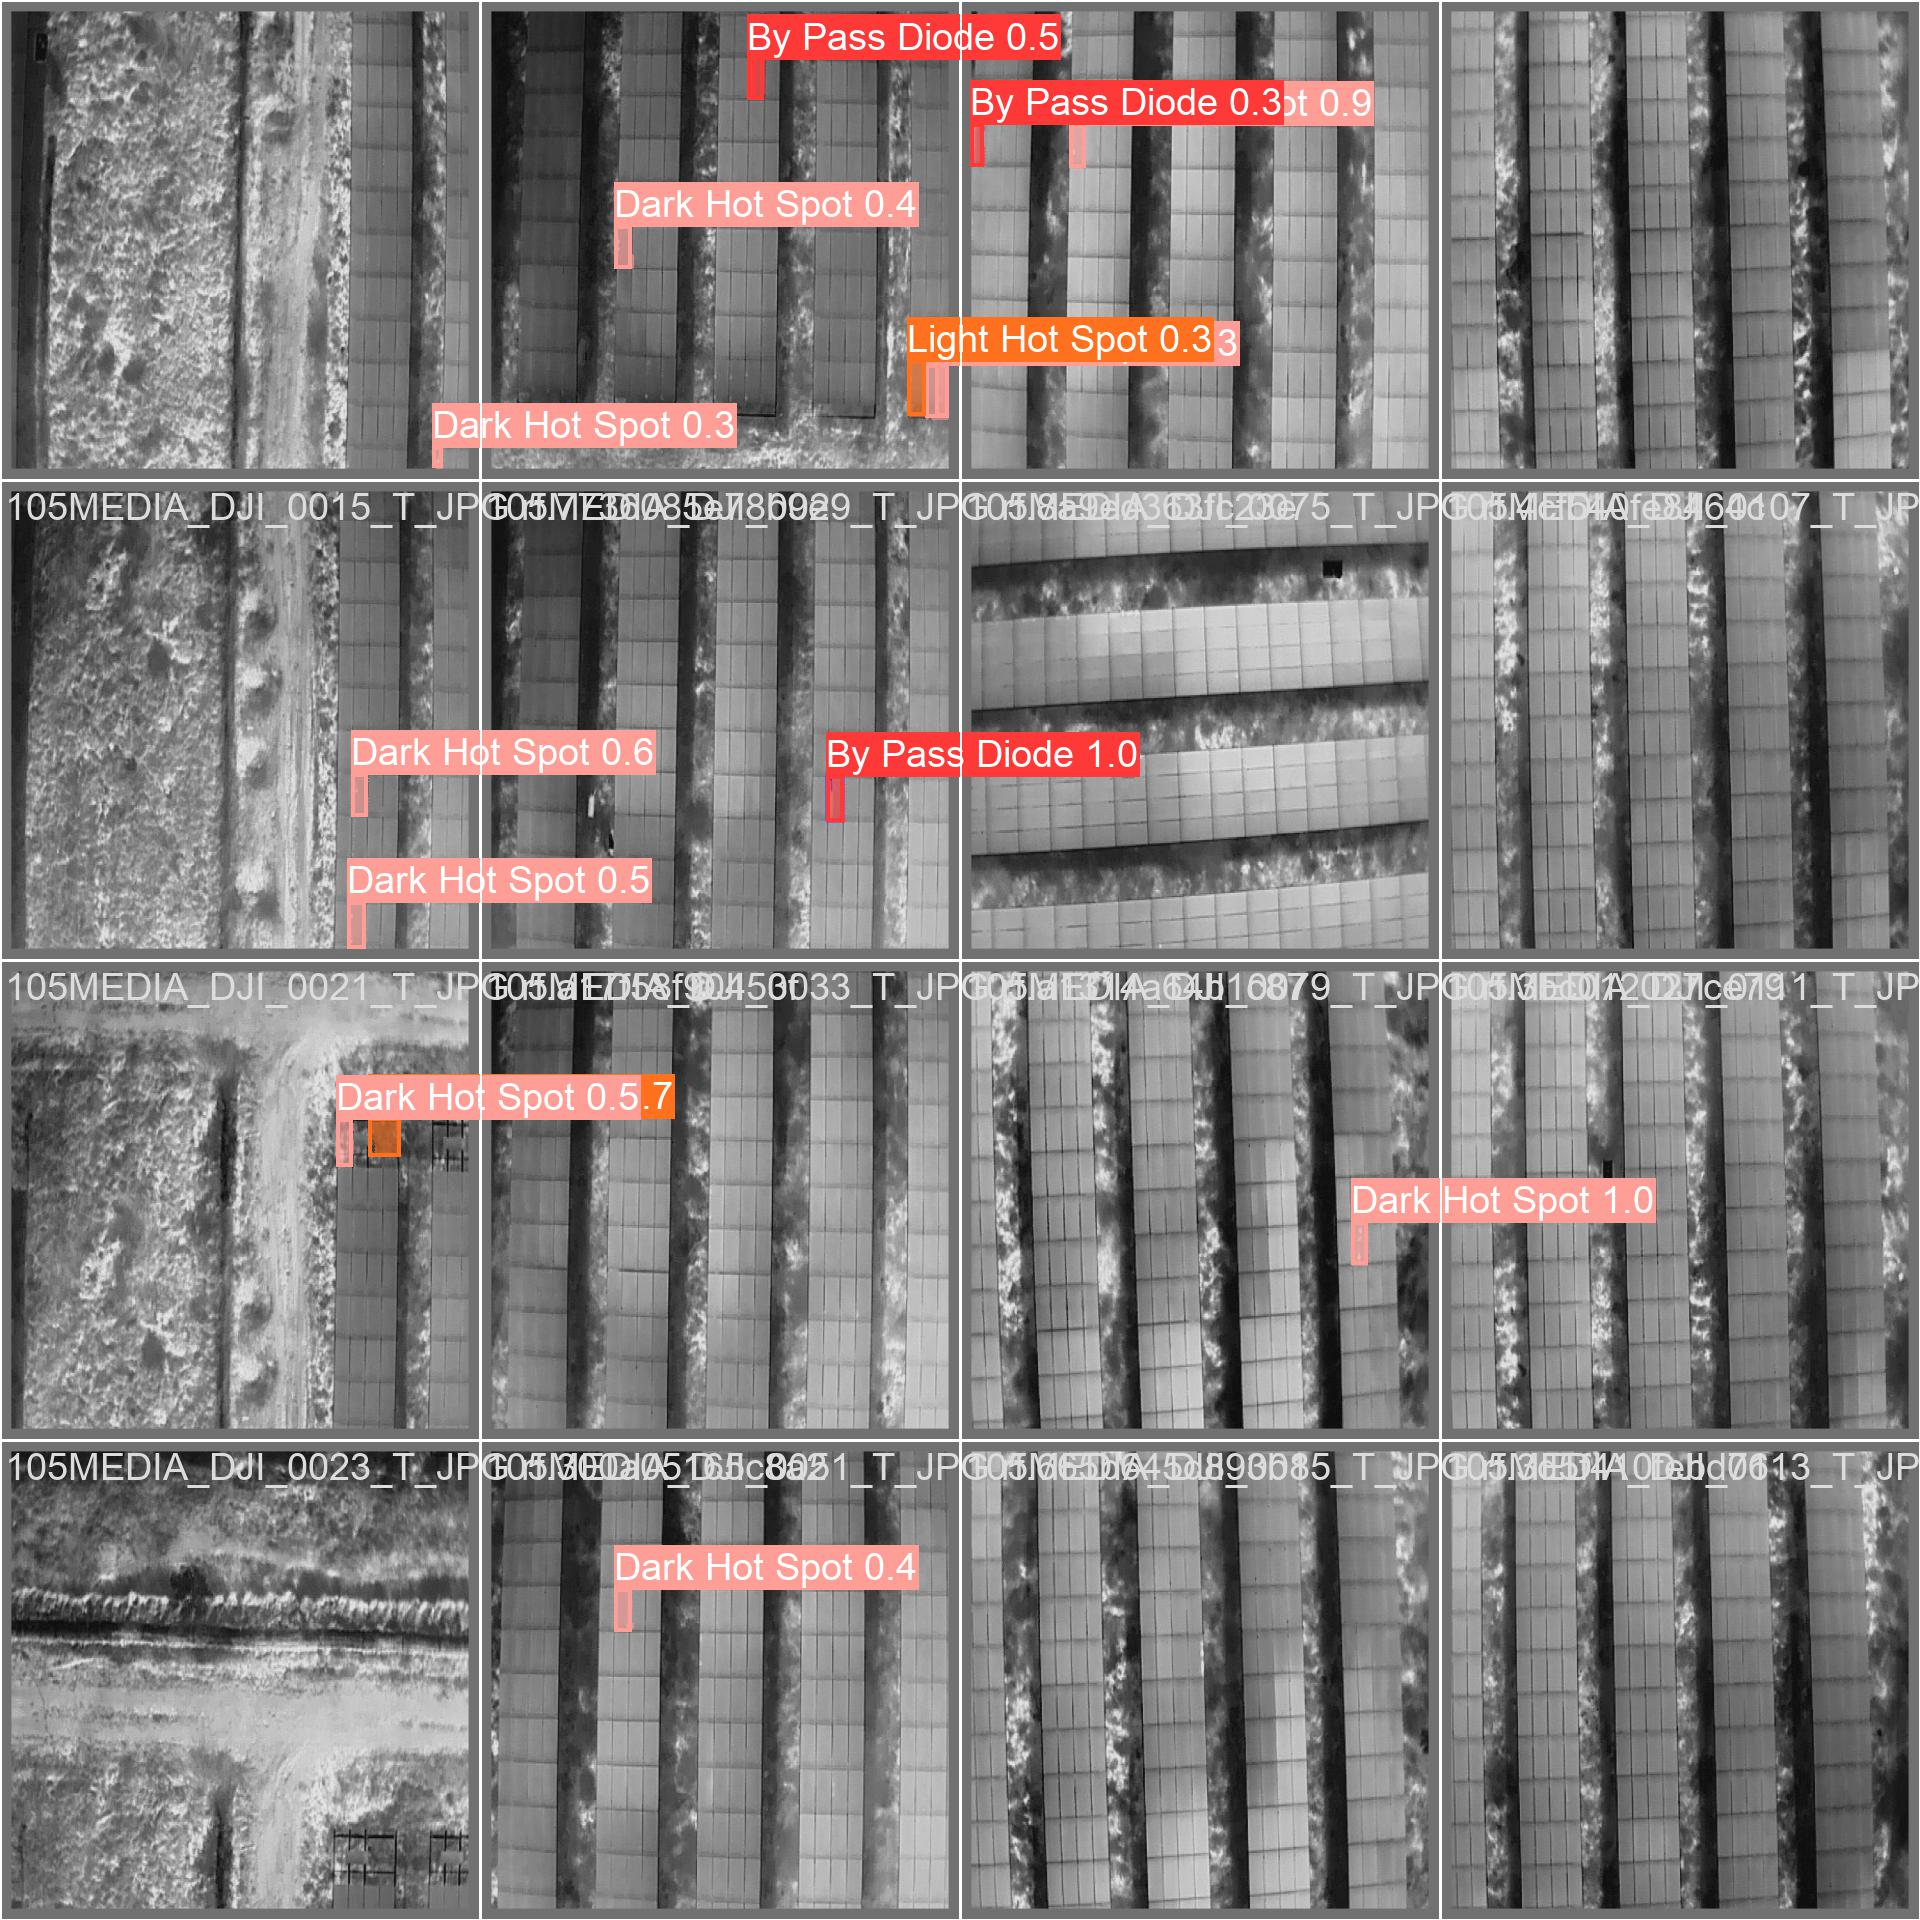

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)

/content


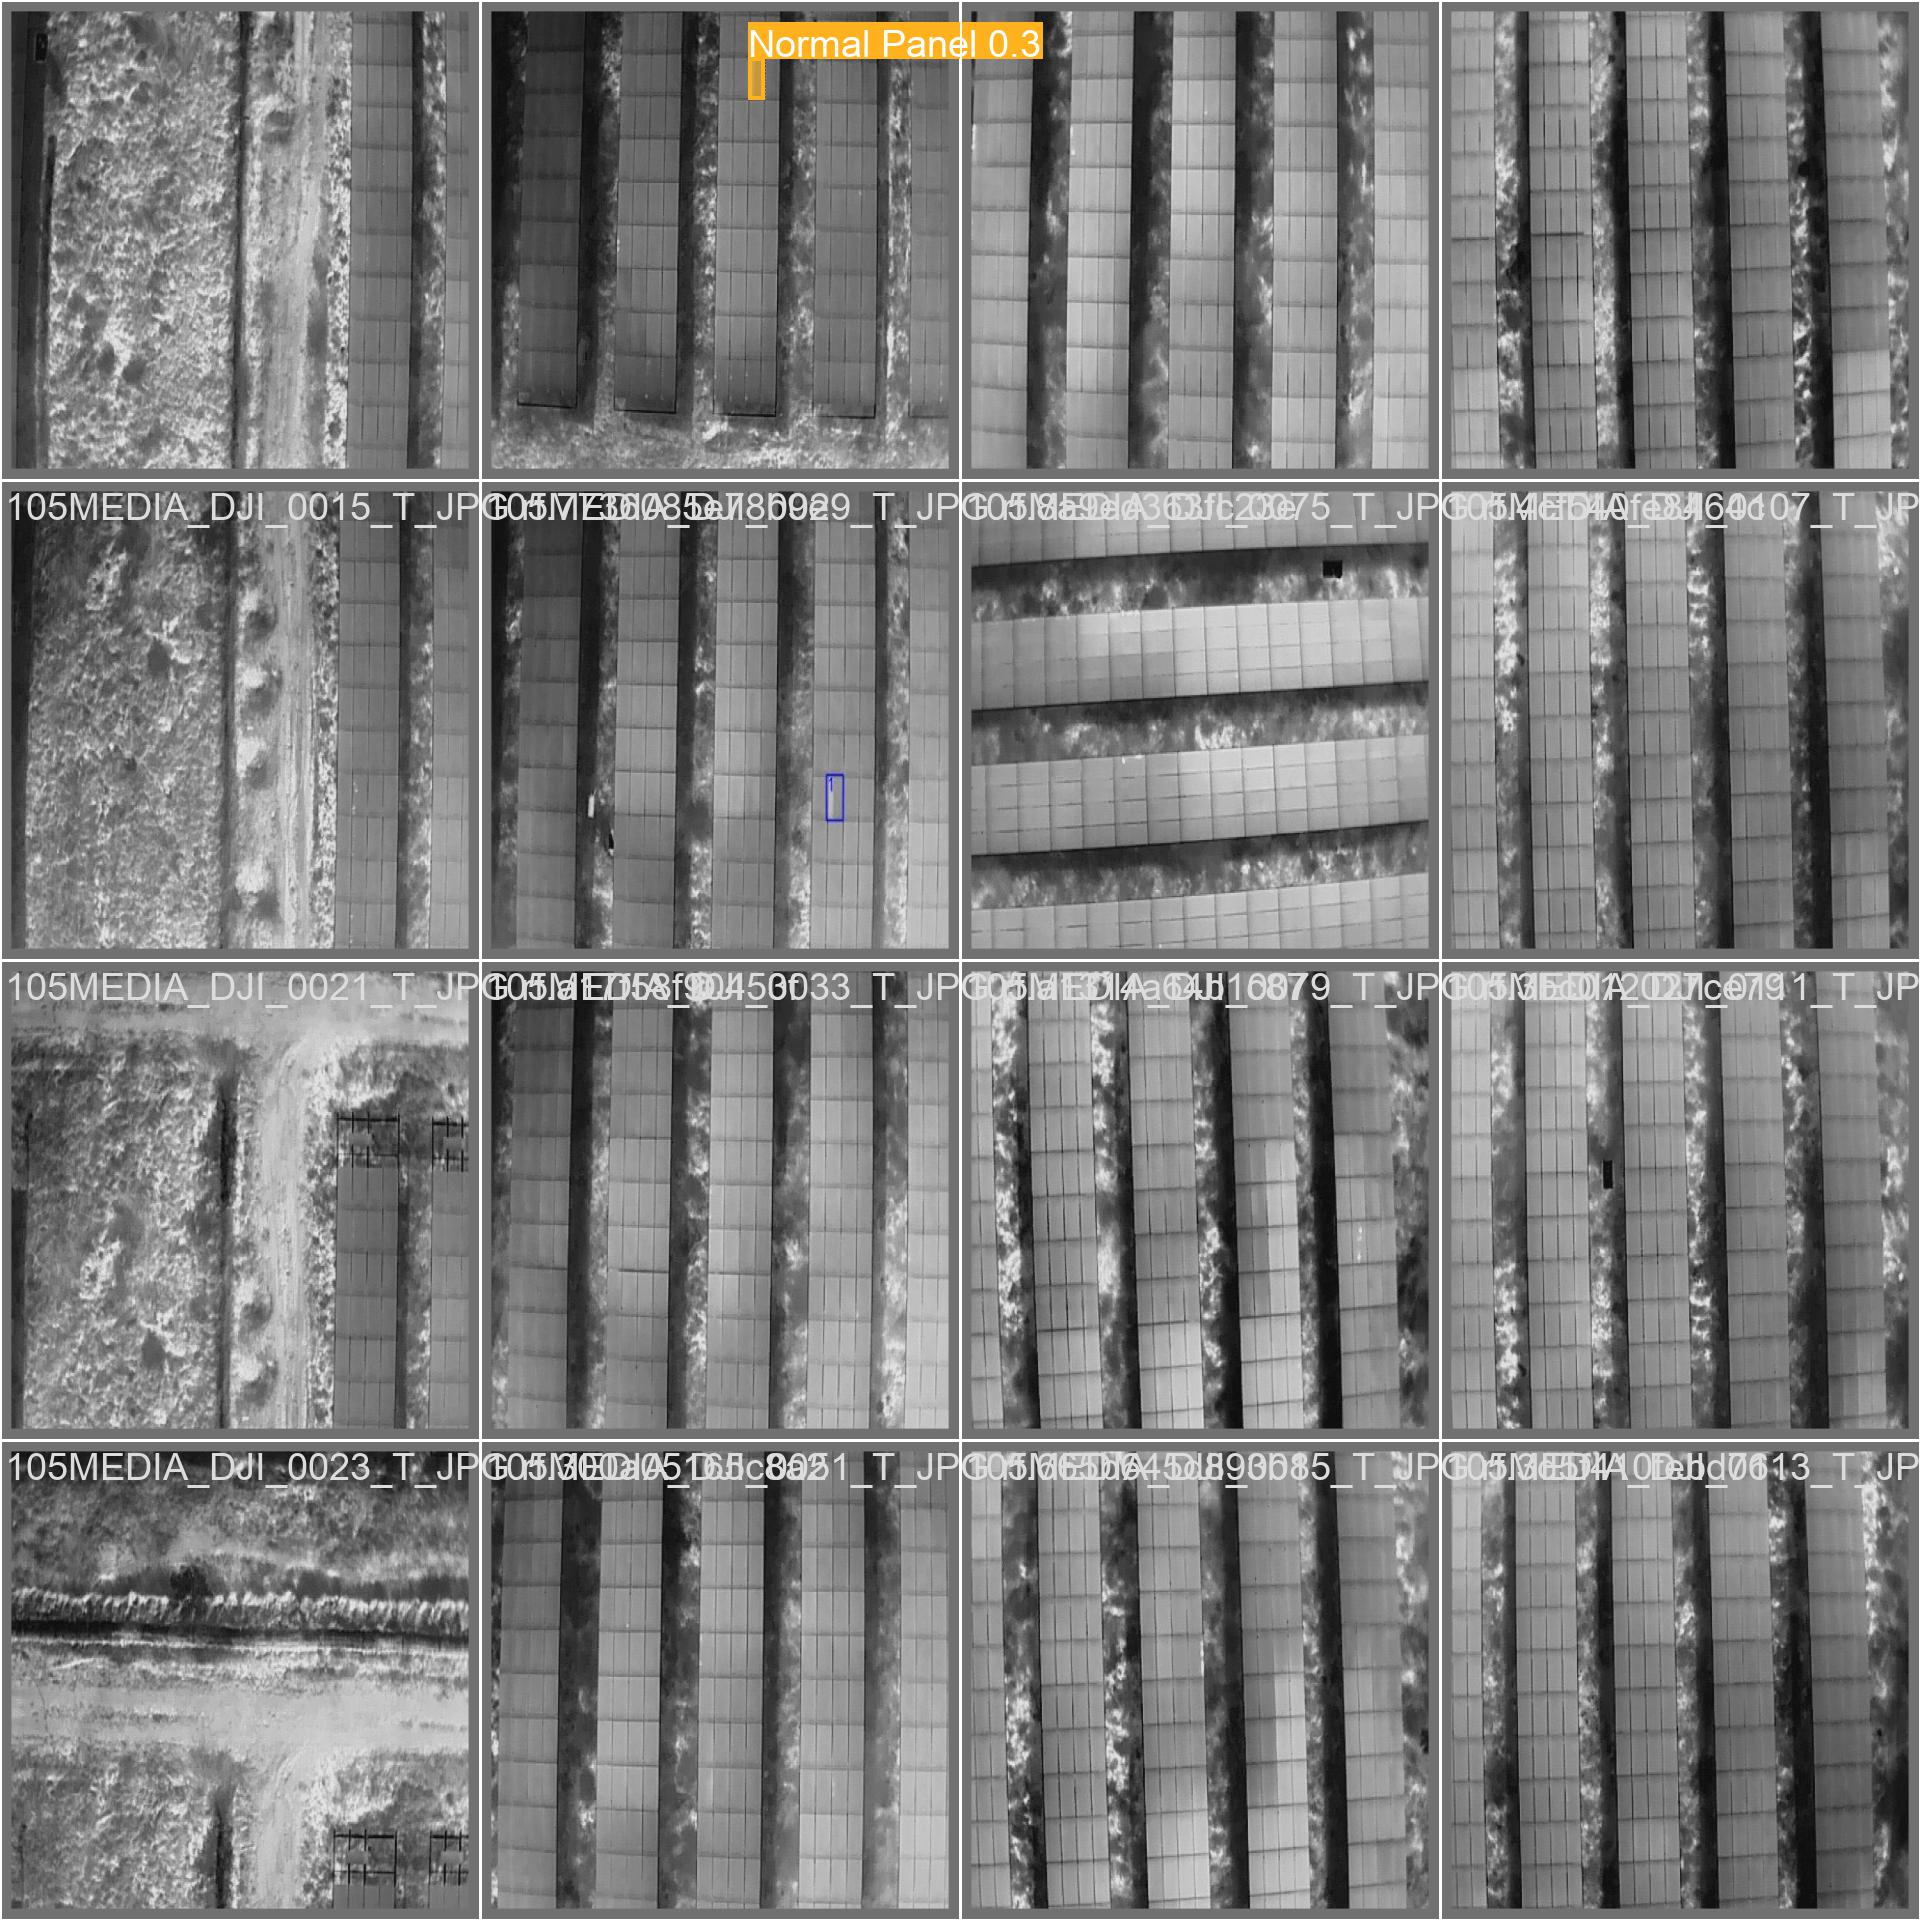

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train3/val_batch0_pred.jpg', width=600)

/content


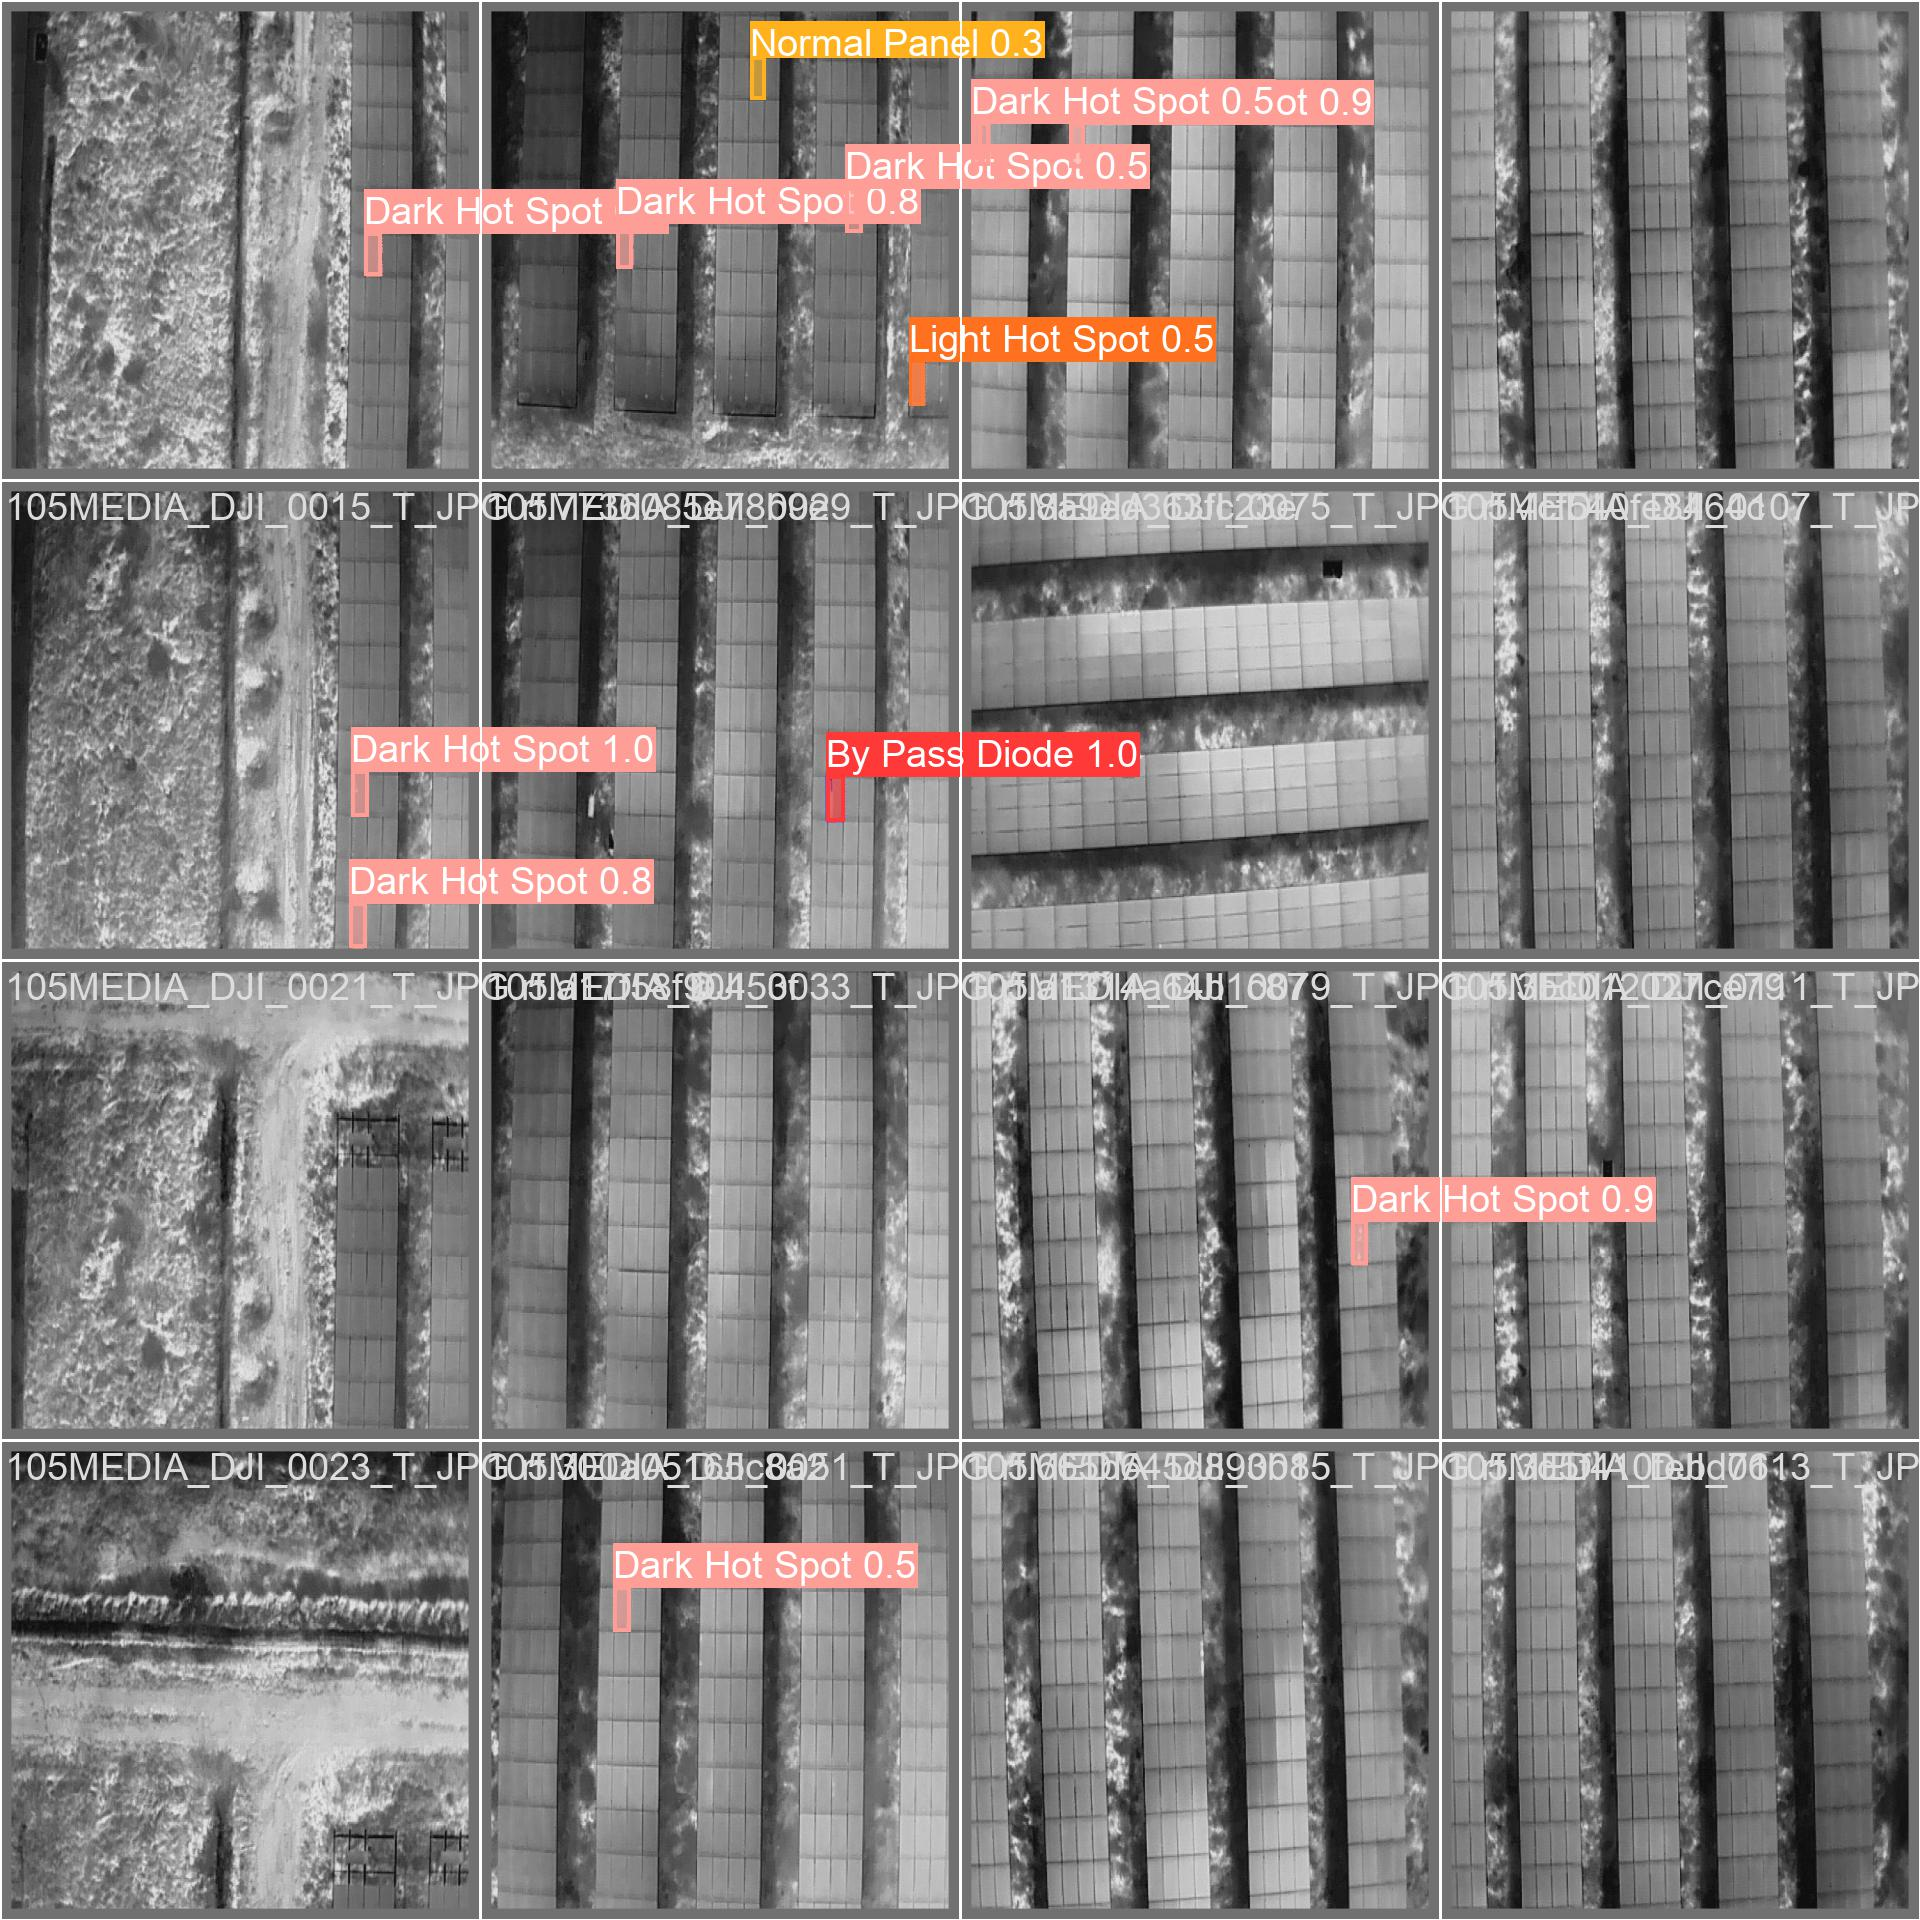

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

/content


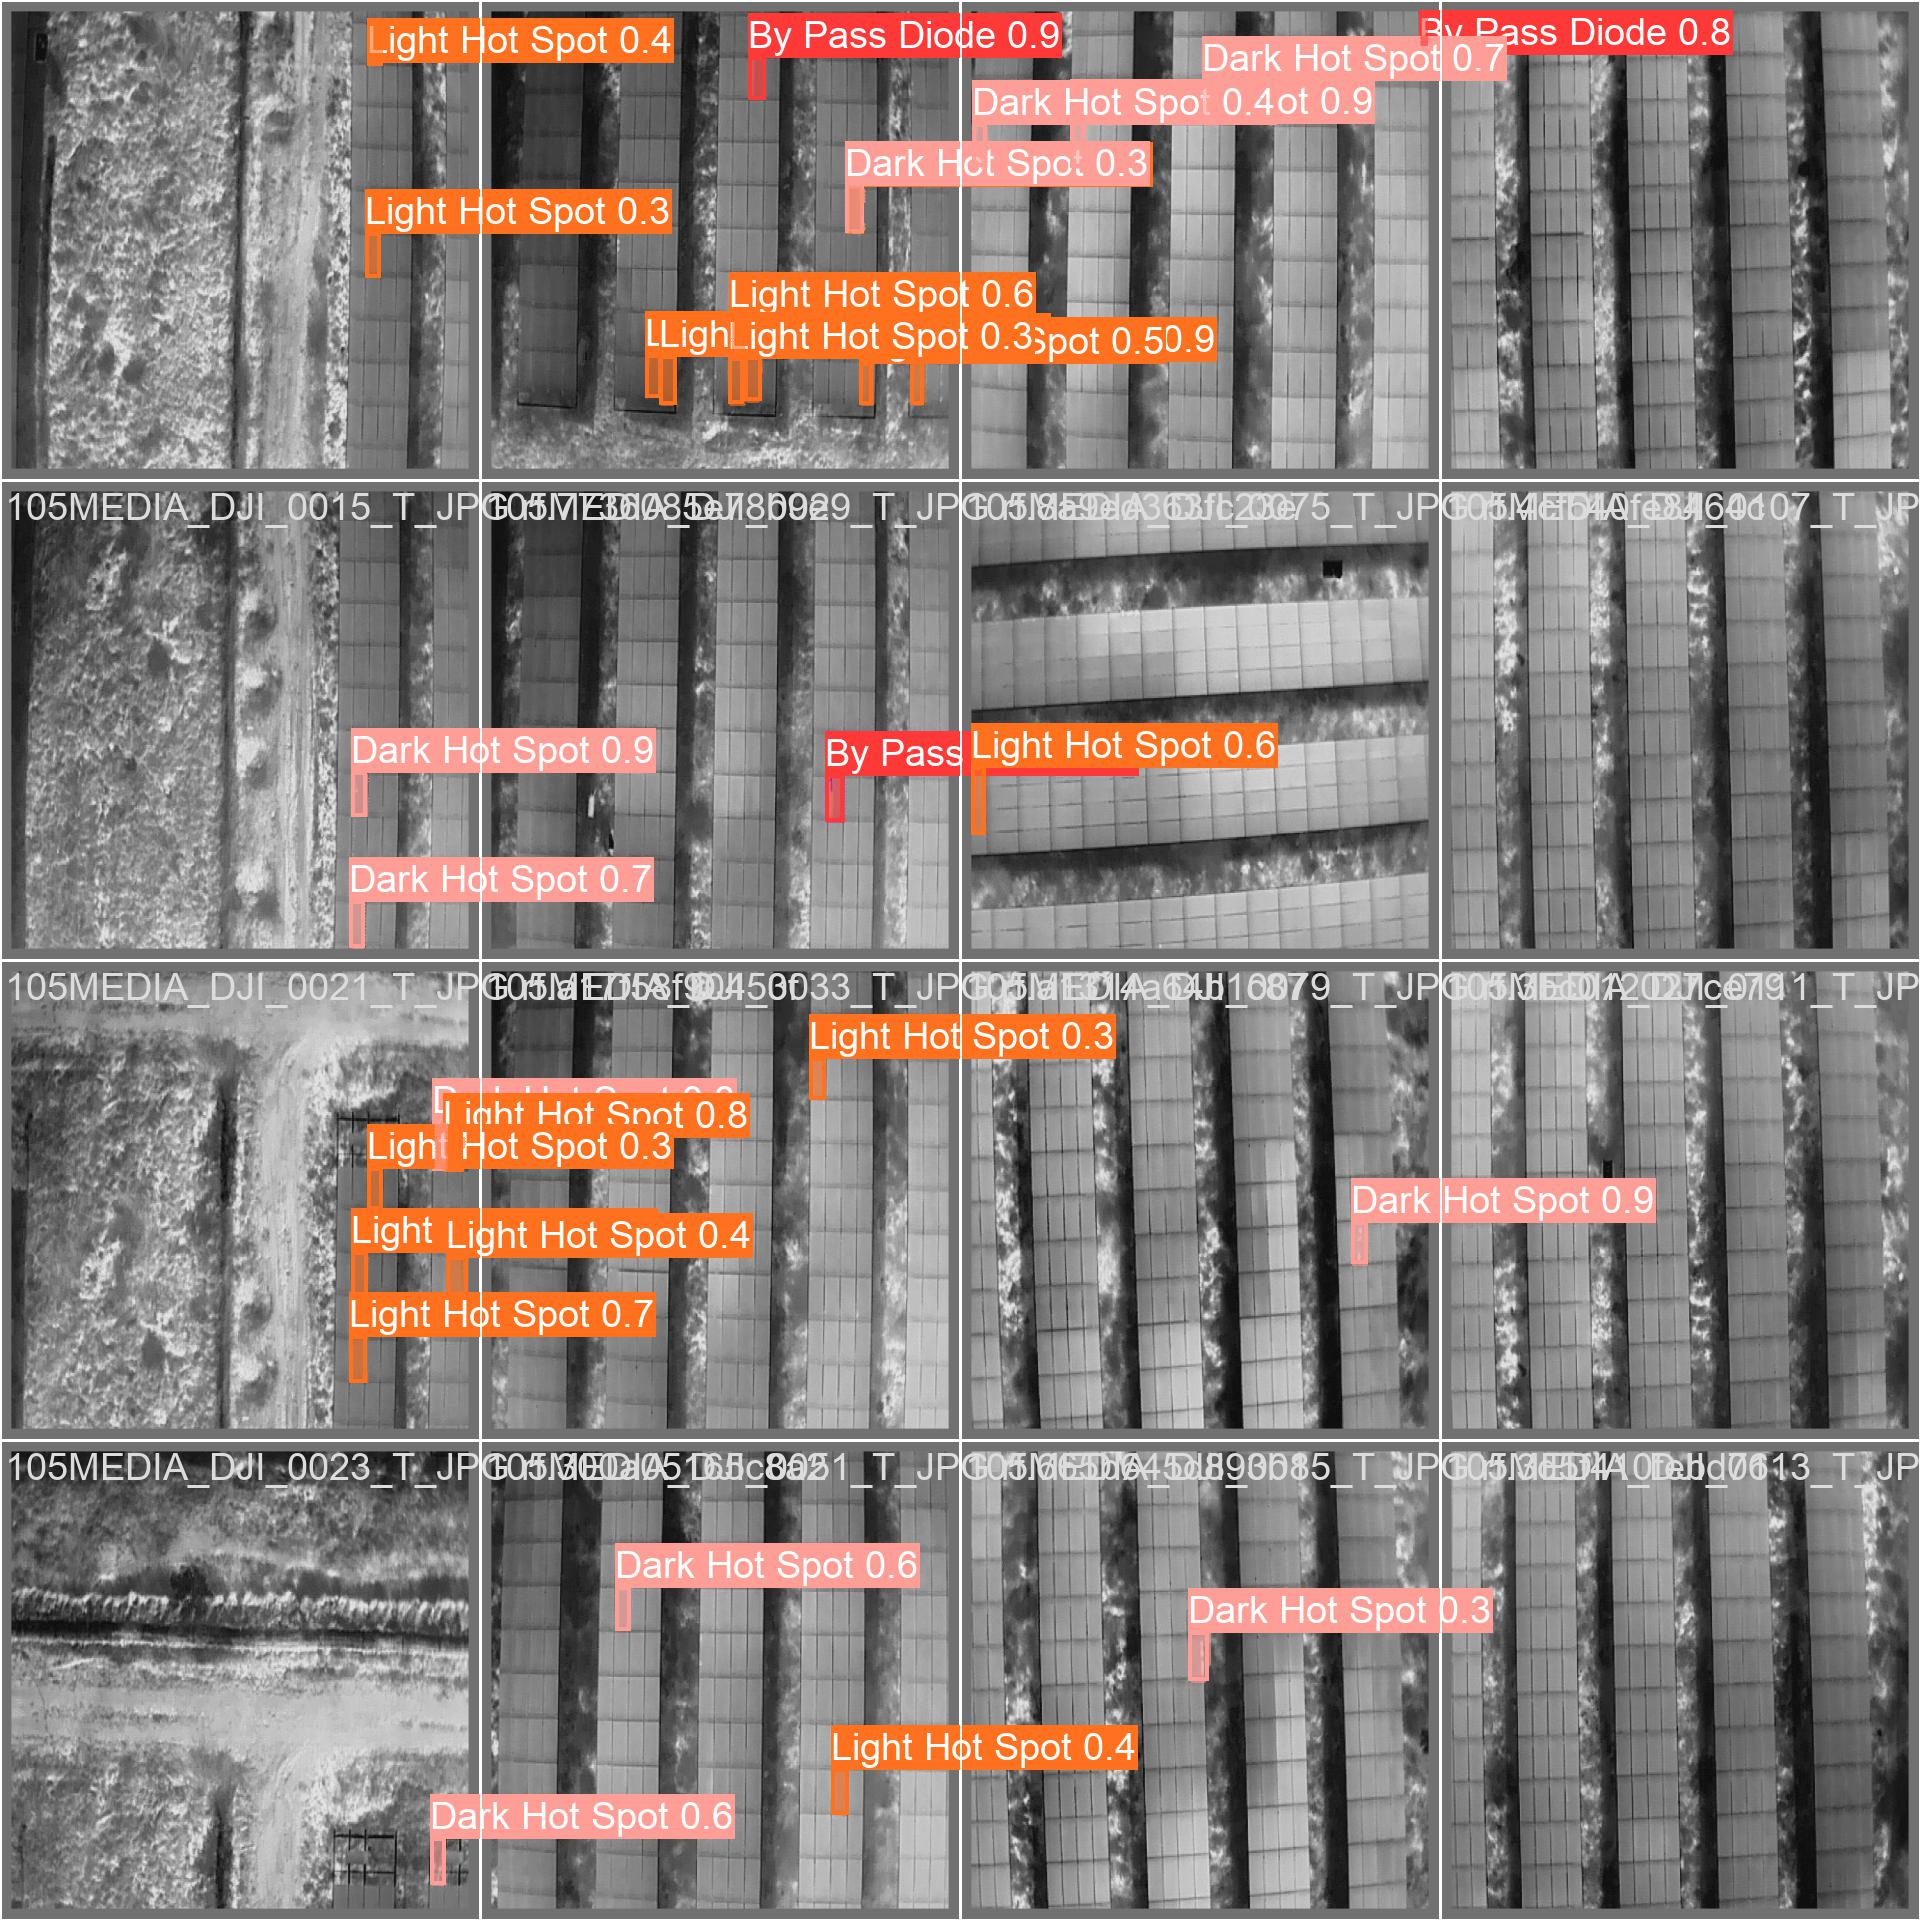

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)

# **Validating the trained model**

From the results we can see that the training with "yolov8m-seg.pt" gave better results than the other with both 20 and 40 epochs. Though the dataset eas very small and not enough to draw any conclusion, for assugnment purpose I am choosing type weights of yolov8m-seg.pt with 40 epochs to validate the trained model.

In [13]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27224700 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/koustav-assignment-3-1/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.06s/it]
                   all         16         32       0.92      0.389      0.469      0.325       0.92      0.389      0.469      0.308
         By Pass Diode         16          2      0.771          1      0.995      0.746      0.771          1      0.995      0.696
         Dark Hot Spot         16          8      0.908      0.375      0.501       0.32      0.908      0.375      0.501      0.329
        Light Hot Spot         16         15          1       0.18      0.382      0.234          1       0

## **Inference with Trained Model**

In [16]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71724508 parameters, 0 gradients, 343.7 GFLOPs

image 1/1 /content/datasets/koustav-assignment-3-1/test/images/105MEDIA_DJI_0103_T_JPG.rf.afbb6593409f9e24d325a8b63b54bc35.jpg: 640x640 2 Dark Hot Spots, 95.5ms
Speed: 0.6ms pre-process, 95.5ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


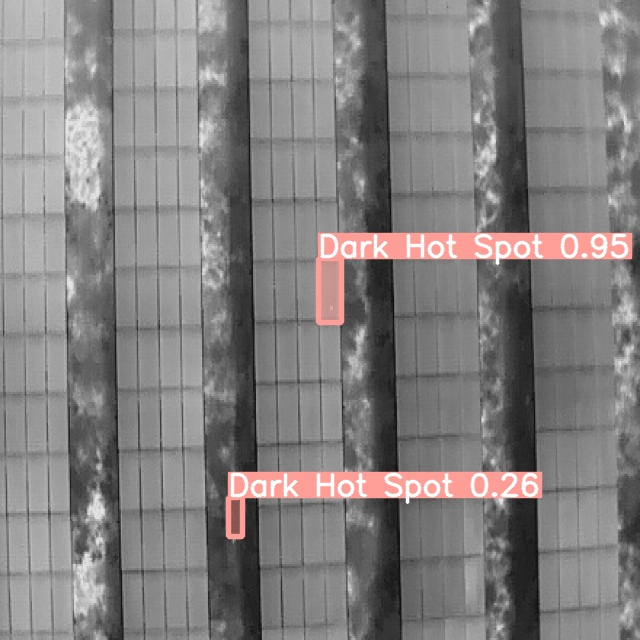

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

# **End of Notebook**